# Estudio de los datasets

## Lectura de datasets e importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Para mostrar todas las columnas
pd.set_option('display.max_columns', None, "display.max_columns", None)

In [2]:
df1 = pd.read_csv(r'datasets/clean_bening.csv',low_memory=False)
df2 = pd.read_csv(r'datasets/clean_patho.csv',low_memory=False)

In [3]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22631 entries, 0 to 22630
Data columns (total 172 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   Unnamed: 0                          int64  
 1   #chr                                object 
 2   pos(1-based)                        int64  
 3   ref                                 object 
 4   alt                                 object 
 5   aaref                               object 
 6   aaalt                               object 
 7   hg19_chr                            object 
 8   hg19_pos(1-based)                   int64  
 9   aapos                               float64
 10  SIFT_score                          float64
 11  SIFT4G_score                        float64
 12  Polyphen2_HDIV_score                float64
 13  Polyphen2_HVAR_score                float64
 14  LRT_score                           float64
 15  LRT_Omega                           float64
 16  Mut

In [4]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12167 entries, 0 to 12166
Data columns (total 172 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   Unnamed: 0                          int64  
 1   #chr                                object 
 2   pos(1-based)                        int64  
 3   ref                                 object 
 4   alt                                 object 
 5   aaref                               object 
 6   aaalt                               object 
 7   hg19_chr                            object 
 8   hg19_pos(1-based)                   int64  
 9   aapos                               float64
 10  SIFT_score                          float64
 11  SIFT4G_score                        float64
 12  Polyphen2_HDIV_score                float64
 13  Polyphen2_HVAR_score                float64
 14  LRT_score                           float64
 15  LRT_Omega                           float64
 16  Mut

In [5]:
del df1['Unnamed: 0']
del df2['Unnamed: 0'] # Índices de los dataframes anteriores

## Explicación básica de algunos conceptos

- SNP: 

Un polimorfismo puntual, también denominado de un solo nucleótido o SNP (Single Nucleotide Polymorphism, pronunciado snip), es una variación en la secuencia de ADN que afecta a una sola base (adenina (A), timina (T), citosina (C) o guanina (G)) de una secuencia del genoma. Sin embargo, generalmente se considera que cambios de unos pocos nucleótidos, como también pequeñas inserciones y deleciones (indels) pueden ser consideradas como SNP. Una de estas variaciones debe darse al menos en un 1% de la población para ser considerada como un SNP. Si no se llega al 1% no se considera SNP y sí una mutación puntual. 
Los SNPs por sí mismos no proporcionan información sobre genes específicos; simplemente indican una localización cromosómica que es probable que esté estrechamente asociada con un fenotipo dado

- SNV:

SNV (Single Nucleotide Variant); a diferencia de los SNPs carece de limitaciones de frecuencia.

- Splicing de ARN: 

El splicing de ARN, empalme de ARN o ayuste de ARN (del inglés RNA splicing, en donde splice significa en inglés empalmar o unir, ayuste es un término marinero que se refiere al empalme de dos cabos o piezas de madera) es un proceso post-transcripcional de maduración del ARN del cual eliminan ciertos fragmentos secuenciales. Este proceso es muy común en eucariotas, pudiéndose dar en cualquier tipo de ARN aunque es más común en el ARNm. También se ha descrito en el ARNr y ARNt de procariotas y bacteriófagos. Normalmente consiste en eliminar los intrones (regiones no codificantes) del transcrito primario y posteriormente unir los exones (regiones codificantes); aunque existen otros tipos de ajuste donde se eliminan intrones y/o retienen exones (véase splicing alternativo).


- hg18: 

Genome Reference Consortium Human Build 38 (alias)

- hg19: 

Genome Reference Consortium Human Build 37 (GRCh37)

(Estas dos son versiones de las referencias al cromosoma humano usadas en UCSC browser.)

- One-Based coordinates:

Sistema de coordenadas dentro de un cromosoma utilizado en el campo del estudio genético.

### Pequeña introducción al estudio del dataset

Este datasets contienen datos relativos a la probabilidad que existe de patogenicidad en los cambios que se pueden producir de una base durante la transcripción del pre_ARN mensajero a ARN mensajero.
A estos cambios se les denomina SNP, y se producen en el proceso de Splicing (empalme) de ARN.

Chr hace referencia al cromosoma al que se hace referencia, y pos(1-based) a la posición en notación 1-based dentro de dicho cromosoma  respecto a hg38. 'ref' es la base que sufre el cambio, 'alt' es la base por la que es cambiada; 'aaref' es el aminoácido que se produciría con la base anterior y 'aaalt' es el aminoácido que se produce con la nueva base; 'aapos' es la posición dentro de la proteína que codifica y finalmente tenemos hg19_chr y hg19_pos(1-based) que hacen referencia al cromosoma y su posición respectivamente.

In [6]:
a = df1['#chr'].unique().tolist()
myl = [x if x != 'X' else 23 for x in a]
b = [float(i) for i in myl]
b.sort()
myl = [str(x) if x != 23 else 'X' for x in b]
print(myl)

['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0', '18.0', '19.0', '20.0', '21.0', '22.0', 'X']


Están representados todos los cromosomas. Vamos a ver cuantos datos tenemos por cada uno de ellos

In [7]:
df1['#chr'].value_counts()

2.0     3056
16.0    1600
1.0     1506
17.0    1398
9.0     1208
8.0     1162
X       1157
6.0     1133
12.0    1051
5.0     1027
3.0      998
11.0     866
7.0      846
10.0     842
19.0     801
14.0     789
4.0      701
15.0     589
13.0     453
20.0     434
22.0     392
18.0     366
21.0     256
Name: #chr, dtype: int64

In [8]:
df2['#chr'].value_counts()

17.0    1341
1.0     1221
19.0     954
2.0      944
3.0      879
7.0      823
11.0     821
12.0     727
X        595
16.0     510
9.0      451
15.0     403
10.0     394
13.0     358
5.0      275
14.0     247
20.0     238
6.0      225
21.0     175
8.0      172
18.0     150
4.0      145
22.0     119
Name: #chr, dtype: int64

En el dataset 'Benign', el 2 es el cromosoma con diferencia con más representación, y después 1,16,17.
En el dataset 'Pathogenic', el 1 es el más representado, seguido por el 17, 12, 19 y 11. El 2 está bien representado.

Los cromosomas con menos datos son 20, 18, 22, 21 en el primer dataset, y 8,4,18,22 en el segundo.

## Mapa de calor de la matriz de Correlación de las variables

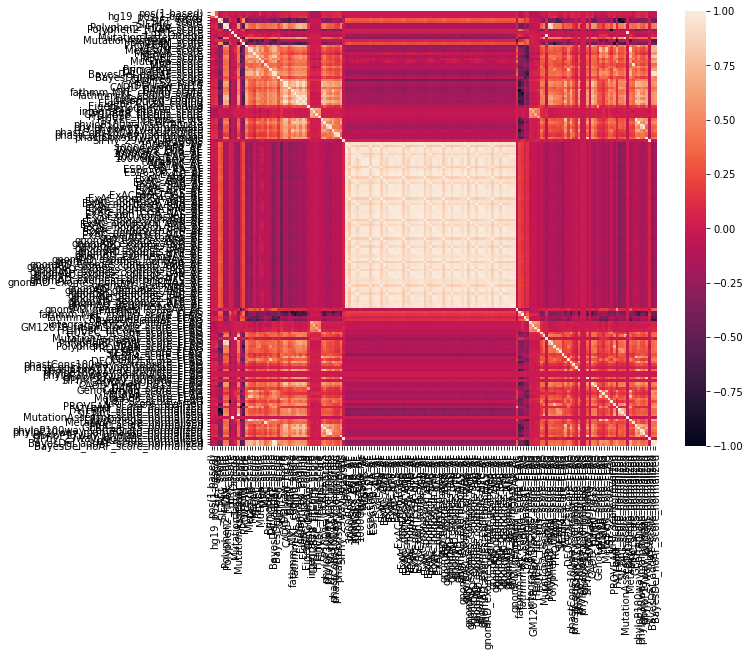

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr().fillna(0)
a = sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
a.get_figure().savefig("imgs/heatmaps/benign.png")

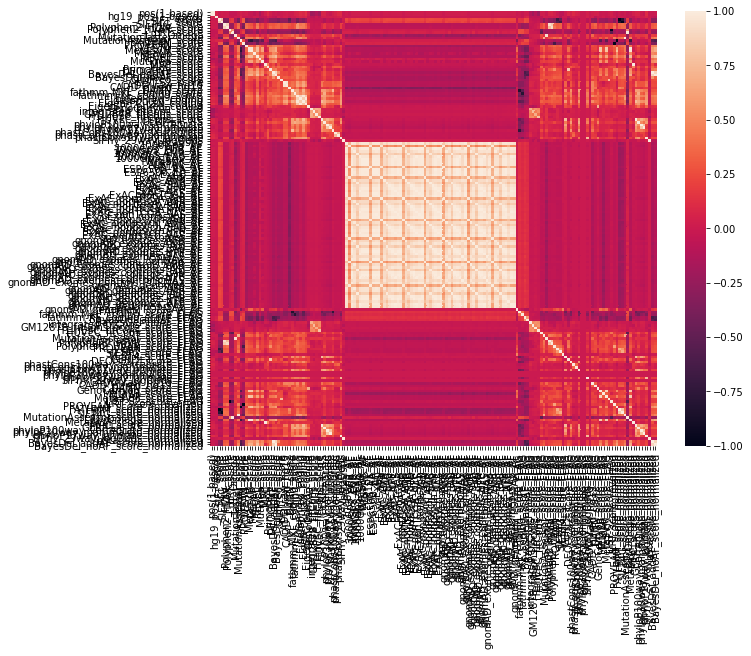

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr().fillna(0)
a = sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
a.get_figure().savefig("imgs/heatmaps/patho.png")

Estos dos mosaicos gigantes de datos nos muestran dos cosas; a pesar de que no se vean con un detalle impresionante, si podemos observar que son muy similares para ambos datasets, por lo que la correlación entre los datos de un dataset y otro existe; por otro lado, también podemos observar cúales son los datos que tienen una mayor relación entre sí (y son los ExAc y genom)

In [11]:
def find_correlation(df, thresh=0.9):
    """
    Given a numeric pd.DataFrame, this will find highly correlated features,
    and return a list of features to remove
    params:
    - df : pd.DataFrame
    - thresh : correlation threshold, will remove one of pairs of features with
               a correlation greater than this value
    """
    
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)

    already_in = set()
    result = []

    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)

    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat, select_nested

### Qué variables tienen una correlación mayor a 0.9 

['pos(1-based)', 'Polyphen2_HDIV_score_FLAG', 'Polyphen2_HDIV_score', 'LRT_Omega', 'MutationTaster_score', 'MutationAssessor_score', 'MetaSVM_score_normalized', 'MetaSVM_score', 'MPC_score', 'BayesDel_addAF_score_normalized', 'BayesDel_noAF_score_normalized', 'BayesDel_addAF_score', 'Eigen-raw_coding', 'Eigen-PC-raw_coding', 'CADD_raw_hg19', 'Eigen-phred_coding', 'GERP++_RS', 'phyloP100way_vertebrate', 'phyloP30way_mammalian', 'phyloP17way_primate', 'SiPhy_29way_logOdds', 'bStatistic', '1000Gp3_EUR_AF', '1000Gp3_AMR_AF', '1000Gp3_EAS_AF', '1000Gp3_SAS_AF', 'TWINSUK_AF', 'ALSPAC_AF', 'UK10K_AF', 'ESP6500_AA_AF', 'ESP6500_EA_AF', 'ExAC_AF', 'ExAC_Adj_AF', 'ExAC_AFR_AF', 'ExAC_AMR_AF', 'ExAC_EAS_AF', 'ExAC_FIN_AF', 'ExAC_NFE_AF', 'ExAC_SAS_AF', 'ExAC_nonTCGA_AF', 'ExAC_nonTCGA_Adj_AF', 'ExAC_nonTCGA_AFR_AF', 'ExAC_nonTCGA_AMR_AF', 'ExAC_nonTCGA_EAS_AF', 'ExAC_nonTCGA_FIN_AF', 'ExAC_nonTCGA_NFE_AF', 'ExAC_nonTCGA_SAS_AF', 'ExAC_nonpsych_AF', 'ExAC_nonpsych_Adj_AF', 'ExAC_nonpsych_AFR_AF', 

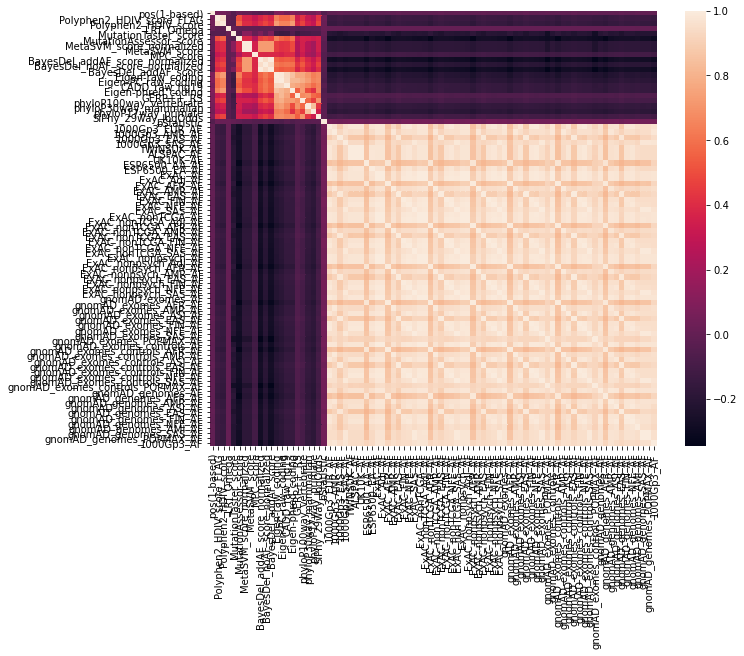

In [12]:
result, to_print = find_correlation(df1, thresh=0.9)
print([item for sublist in to_print for item in sublist])

f, ax = plt.subplots(figsize=(10, 8))
corr = df1[result].corr().fillna(0)

fig = sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
fig.get_figure().savefig("imgs/heatmaps/benign90.png")

['pos(1-based)', 'Polyphen2_HDIV_score', 'Polyphen2_HVAR_score', 'LRT_Omega', 'MutationTaster_score', 'MutationAssessor_score', 'MetaSVM_score_normalized', 'MetaSVM_score', 'MPC_score', 'BayesDel_addAF_score', 'BayesDel_noAF_score', 'CADD_raw_hg19', 'Eigen-raw_coding', 'Eigen-phred_coding', 'GERP++_RS', 'phyloP100way_vertebrate', 'phyloP30way_mammalian', 'phyloP17way_primate', 'SiPhy_29way_logOdds', 'bStatistic', '1000Gp3_AMR_AF', '1000Gp3_SAS_AF', 'TWINSUK_AF', 'ALSPAC_AF', 'UK10K_AF', 'ESP6500_EA_AF', 'ExAC_AF', 'ExAC_Adj_AF', 'ExAC_AMR_AF', 'ExAC_FIN_AF', 'ExAC_NFE_AF', 'ExAC_SAS_AF', 'ExAC_nonTCGA_AF', 'ExAC_nonTCGA_Adj_AF', 'ExAC_nonTCGA_AMR_AF', 'ExAC_nonTCGA_FIN_AF', 'ExAC_nonTCGA_NFE_AF', 'ExAC_nonTCGA_SAS_AF', 'ExAC_nonpsych_AF', 'ExAC_nonpsych_Adj_AF', 'ExAC_nonpsych_AMR_AF', 'ExAC_nonpsych_FIN_AF', 'ExAC_nonpsych_NFE_AF', 'ExAC_nonpsych_SAS_AF', 'gnomAD_exomes_AF', 'gnomAD_exomes_AMR_AF', 'gnomAD_exomes_ASJ_AF', 'gnomAD_exomes_FIN_AF', 'gnomAD_exomes_NFE_AF', 'gnomAD_exomes_

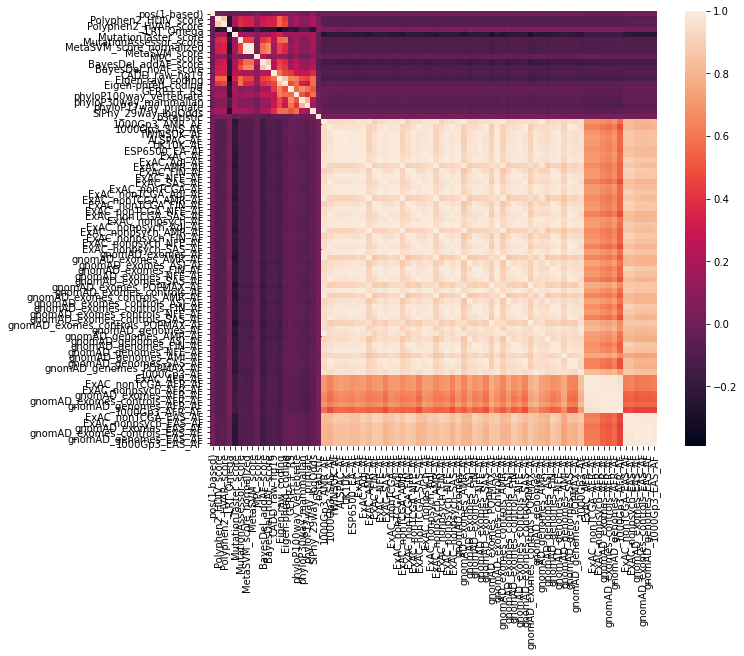

In [13]:
result, to_print = find_correlation(df2, thresh=0.9)
print([item for sublist in to_print for item in sublist])

f, ax = plt.subplots(figsize=(10, 8))
corr = df2[result].corr().fillna(0)

fig = sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
fig.get_figure().savefig("imgs/heatmaps/patho90.png")

## Distribución de los valores para cada variable

In [14]:
import os.path

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


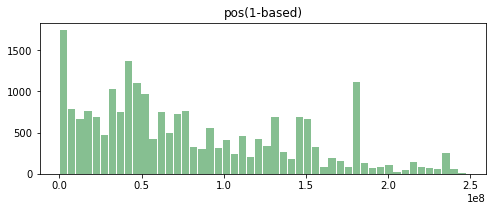

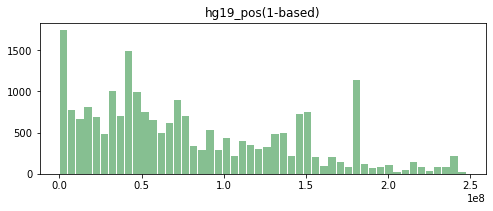

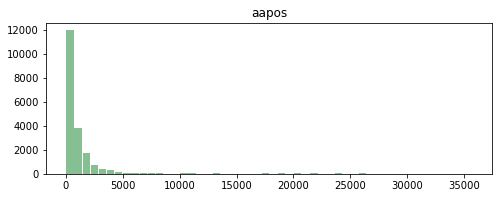

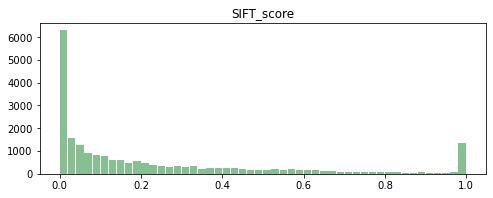

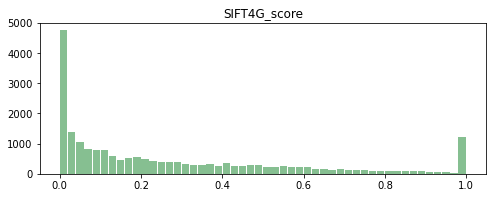

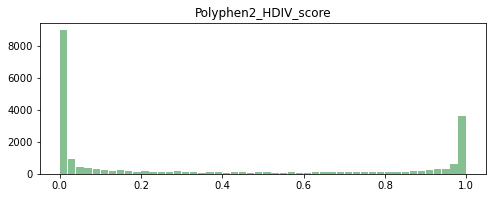

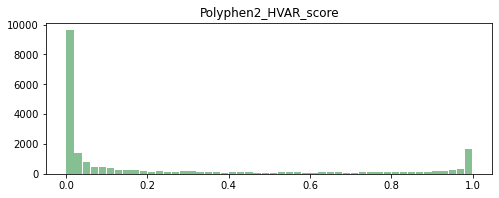

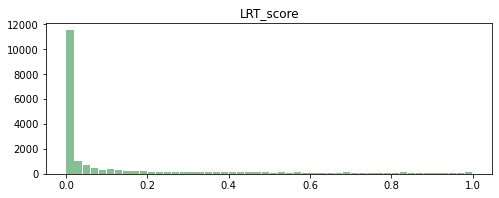

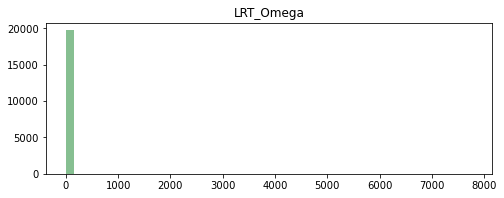

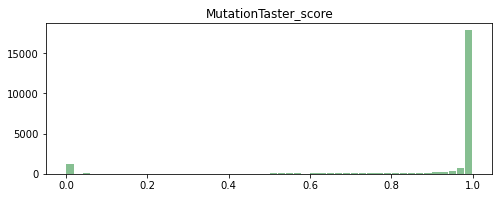

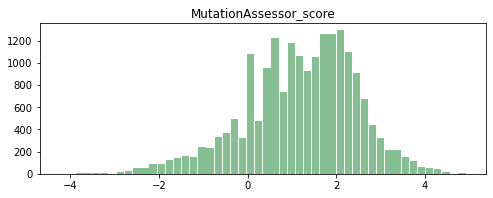

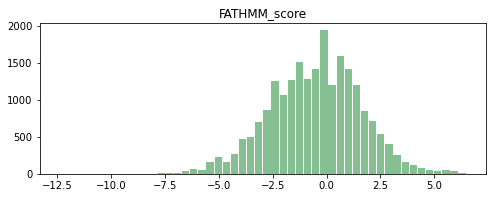

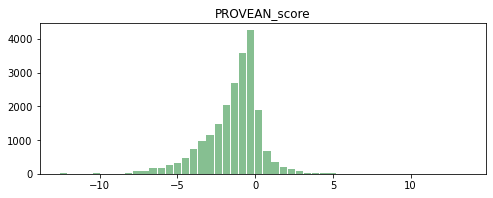

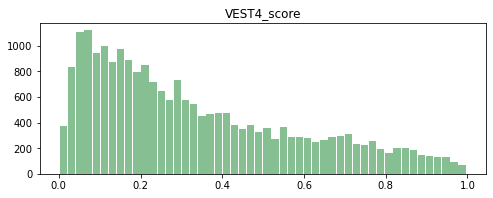

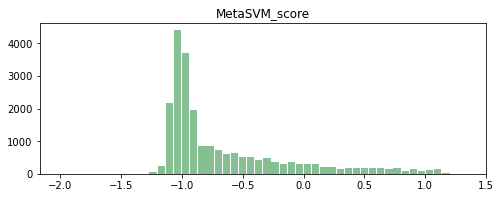

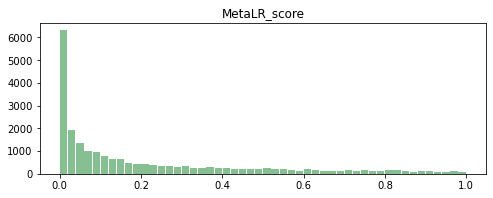

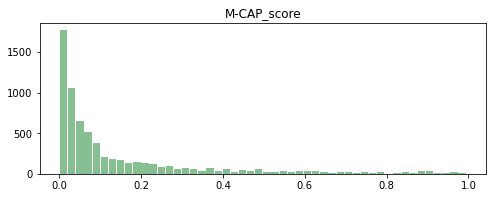

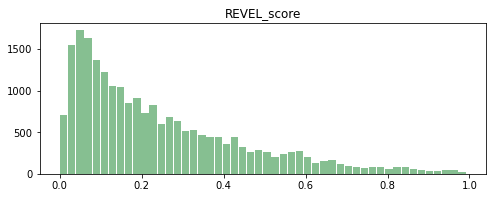

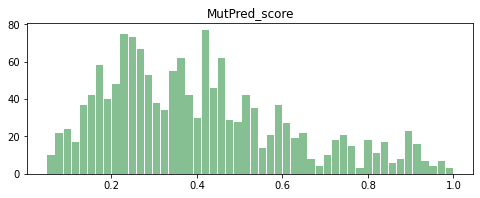

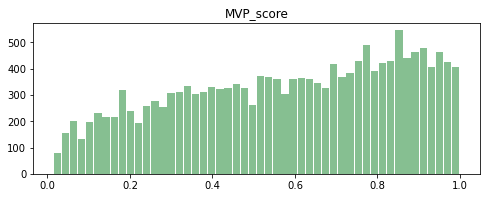

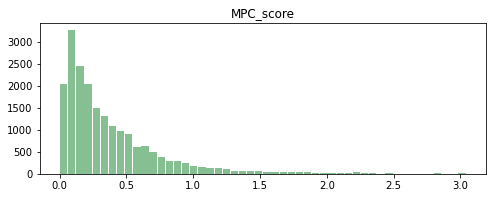

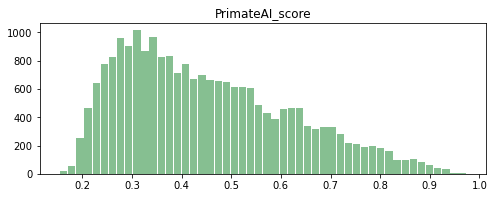

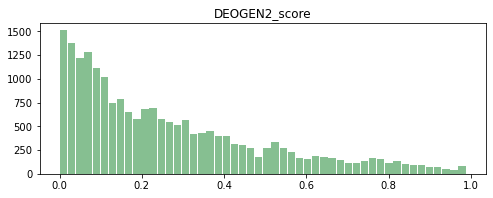

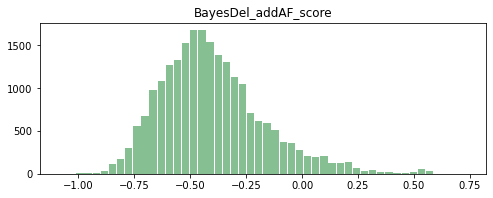

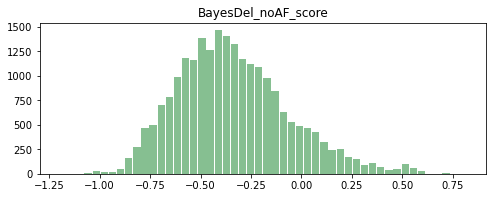

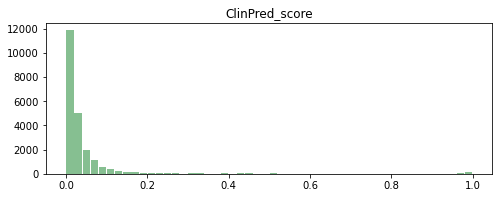

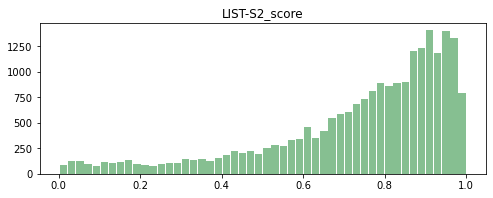

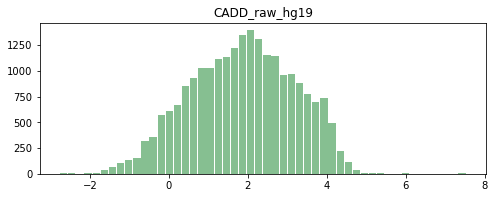

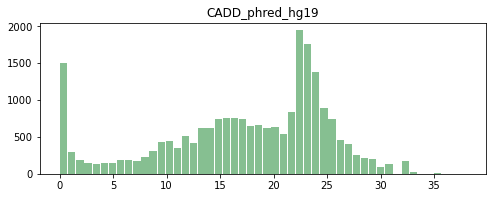

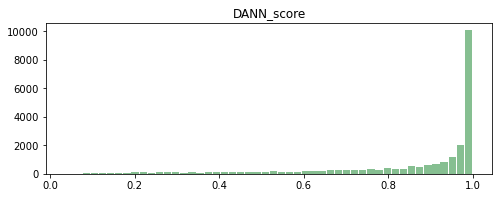

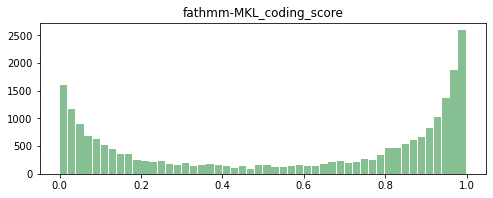

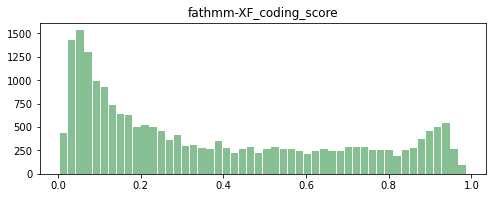

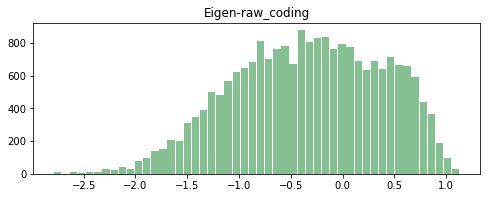

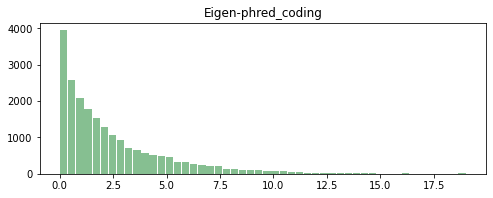

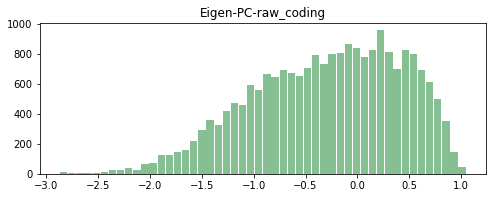

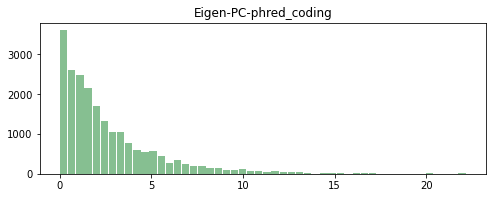

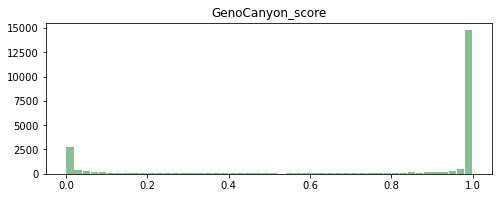

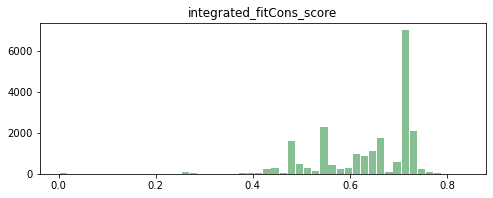

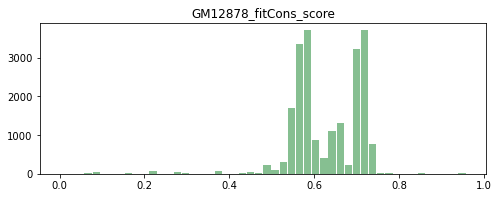

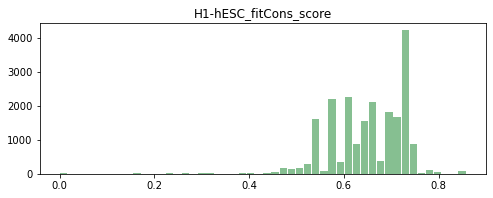

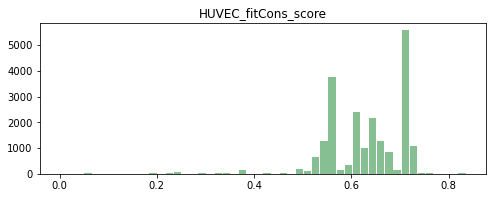

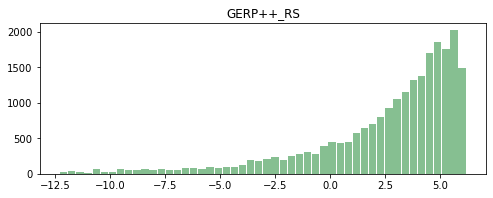

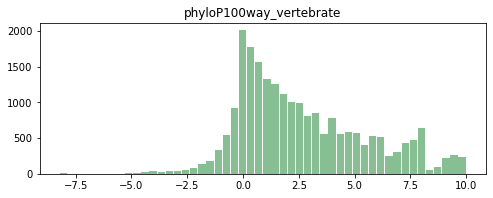

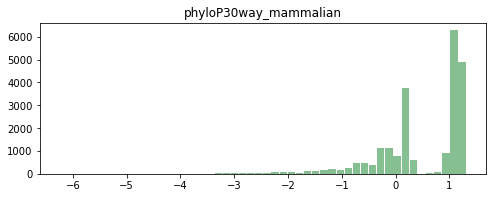

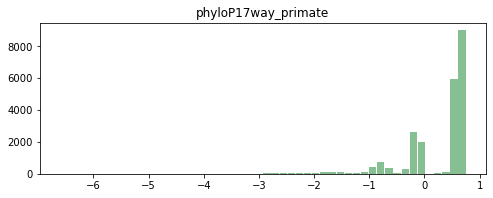

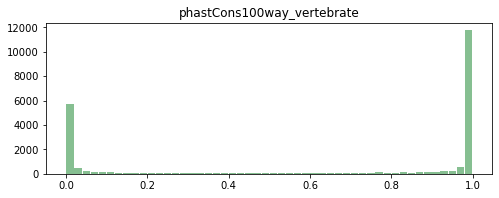

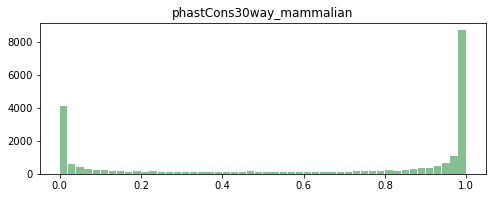

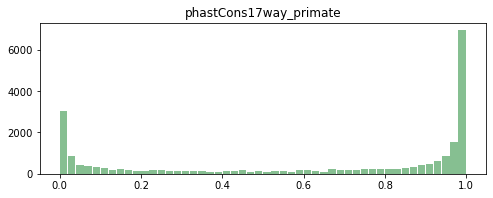

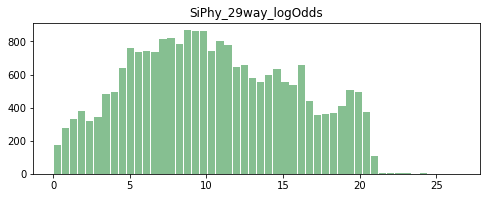

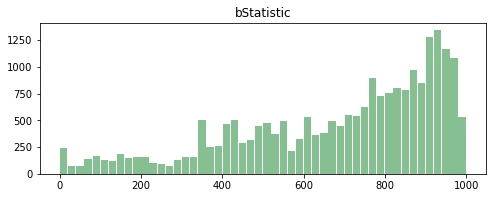

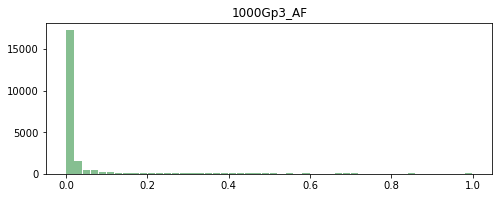

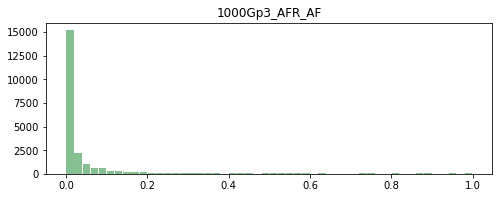

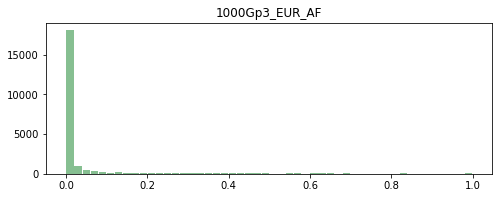

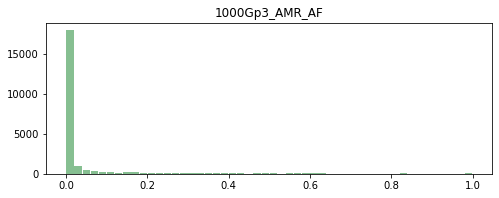

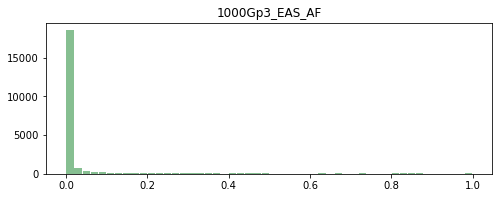

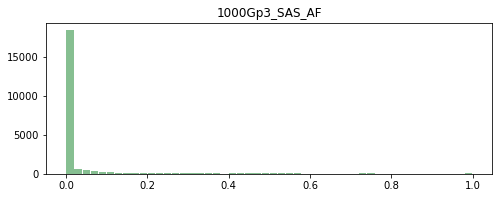

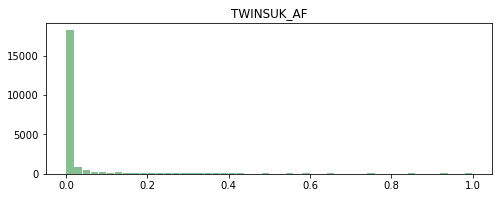

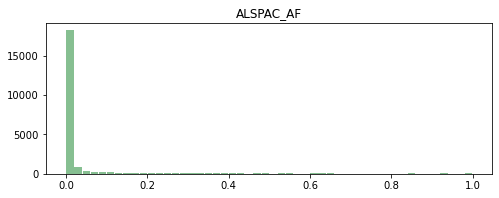

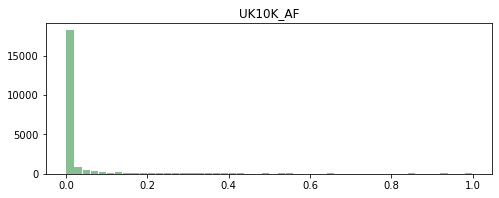

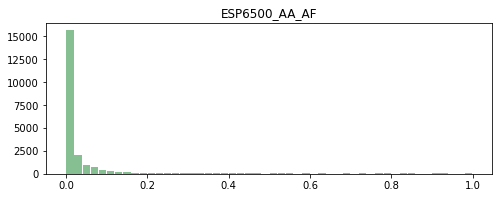

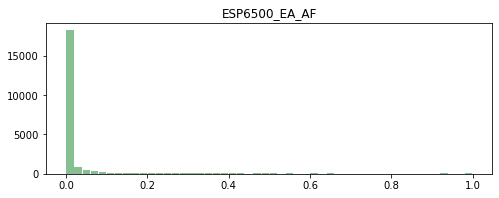

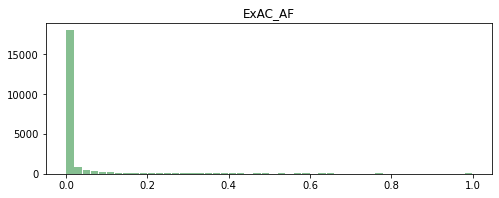

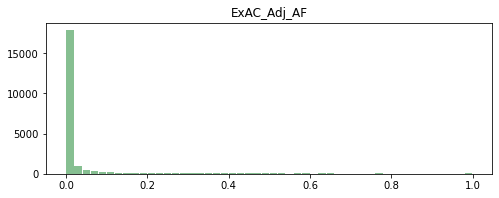

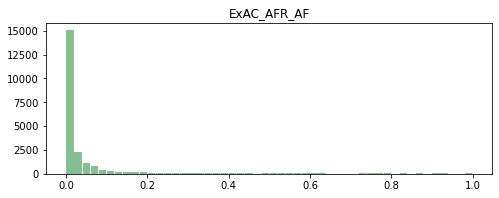

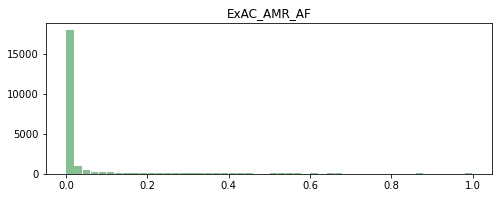

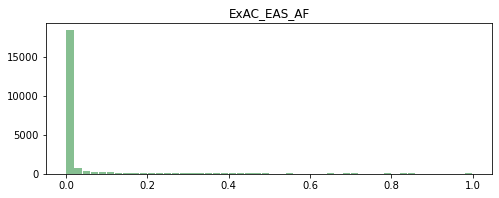

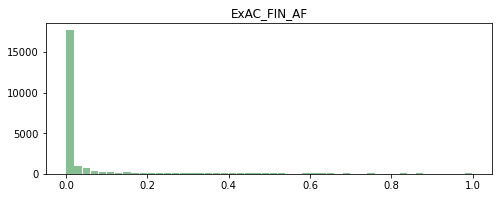

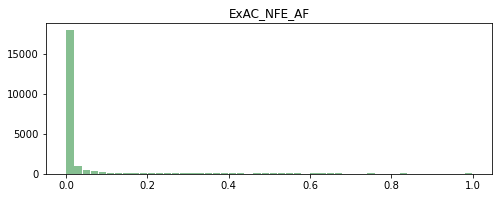

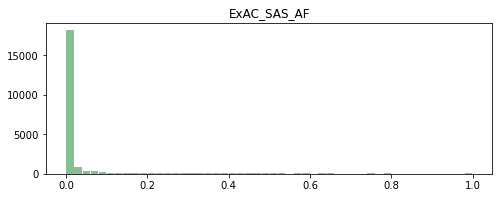

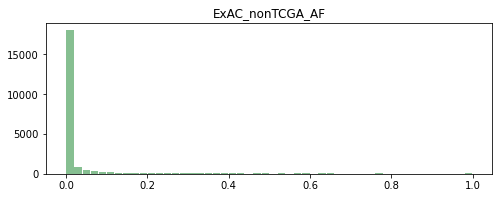

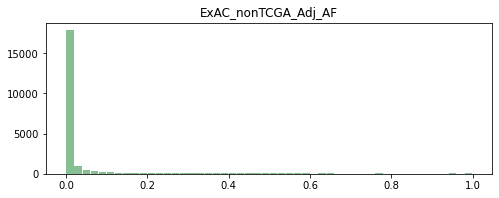

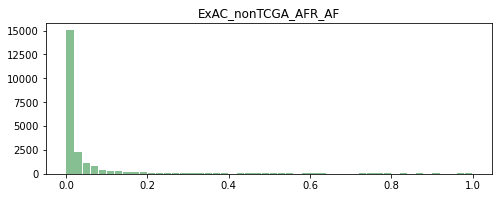

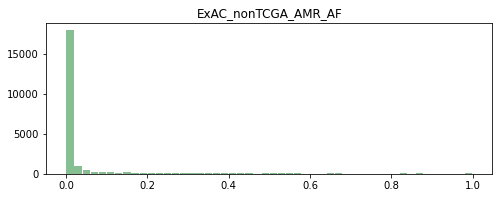

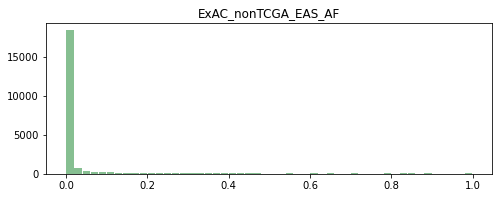

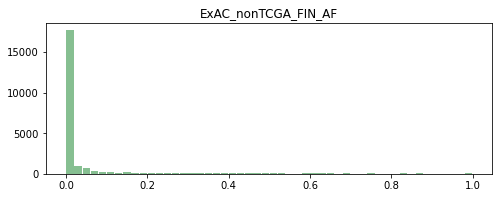

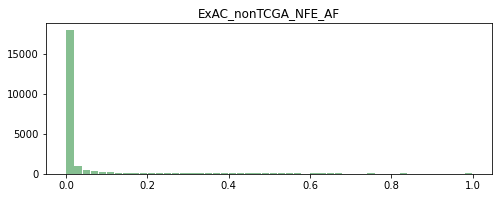

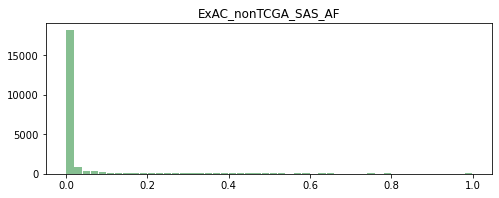

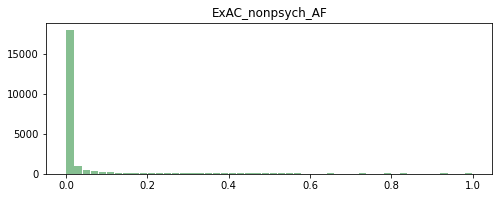

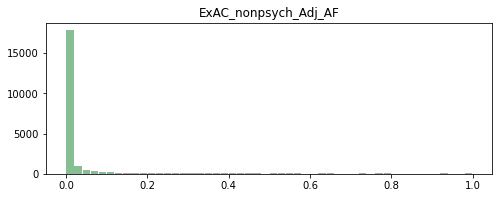

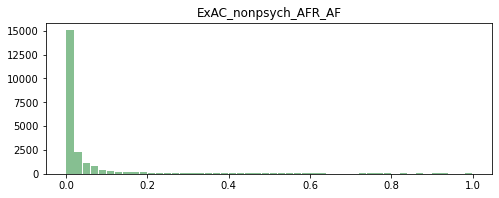

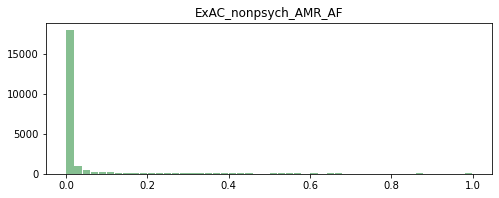

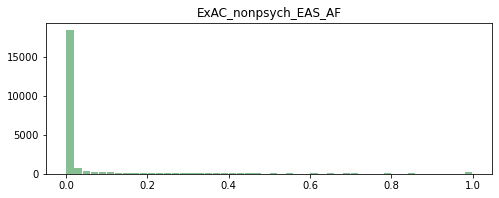

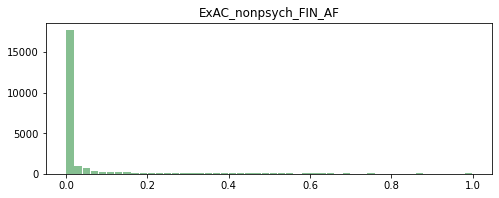

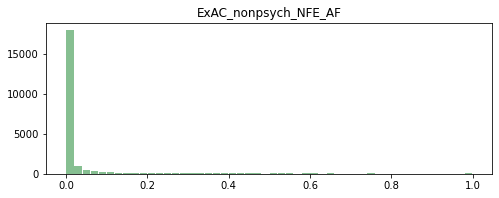

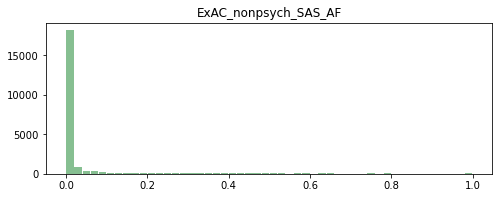

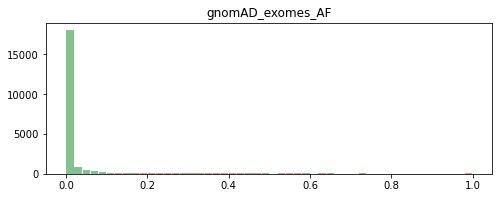

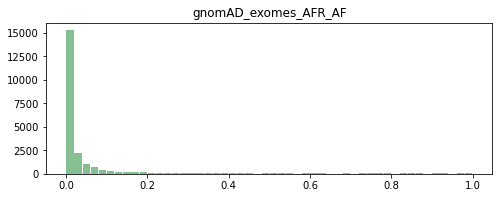

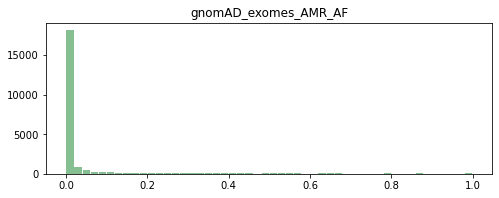

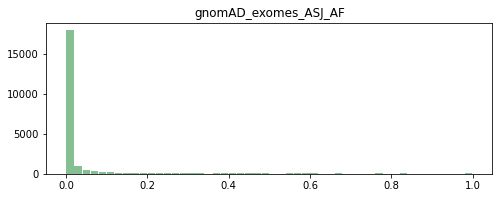

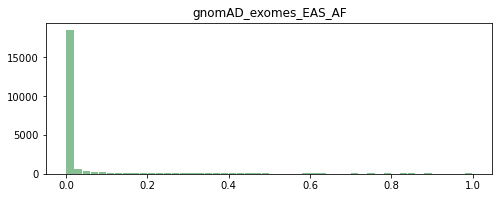

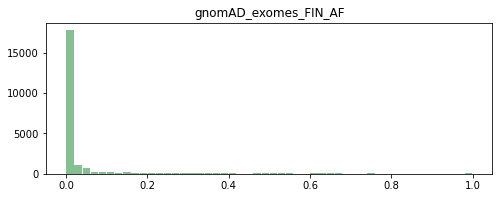

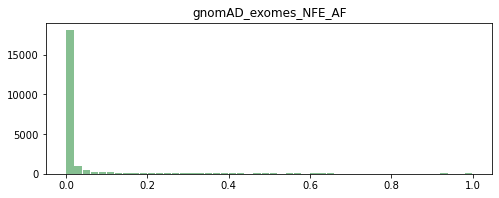

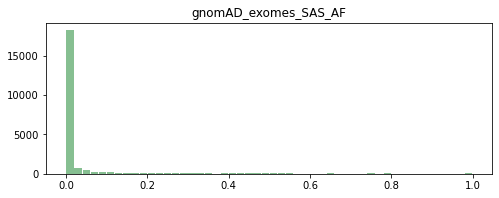

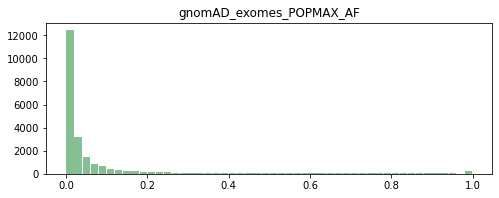

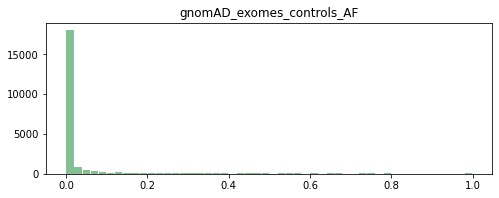

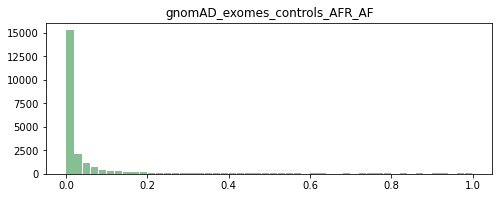

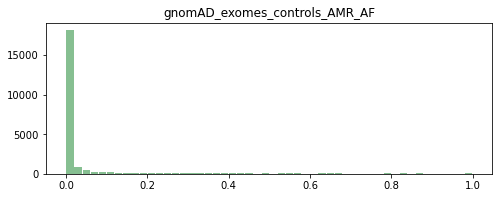

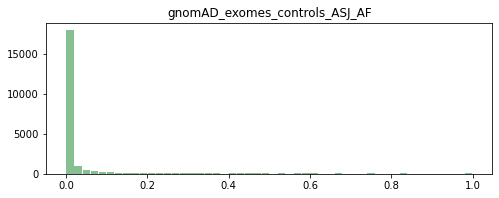

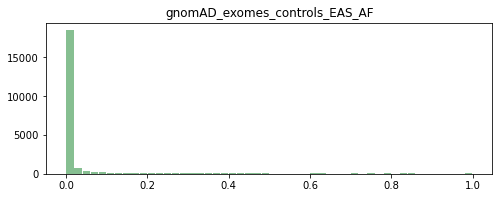

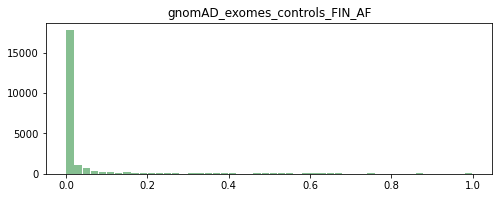

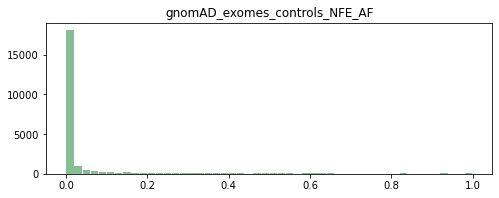

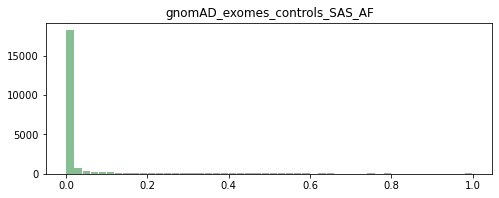

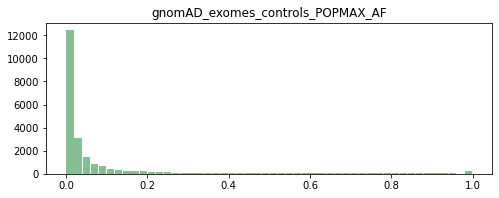

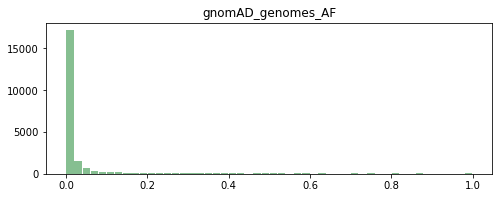

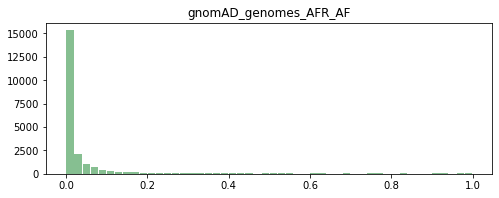

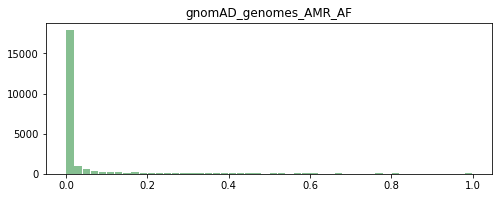

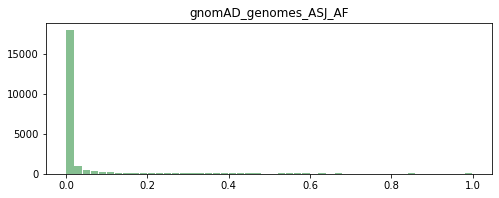

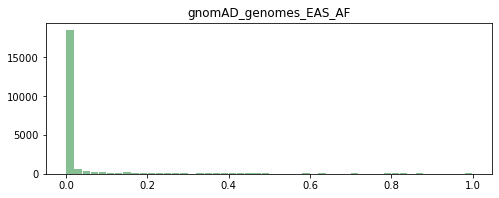

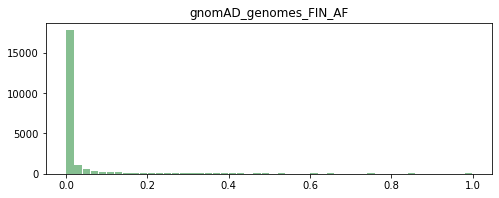

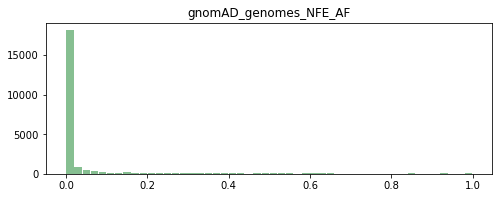

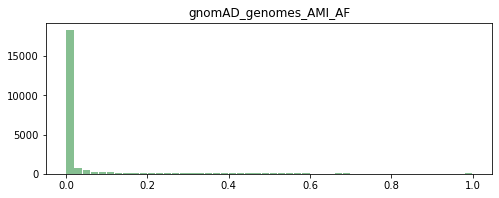

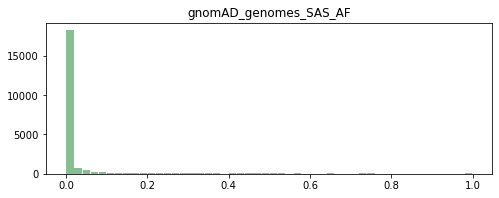

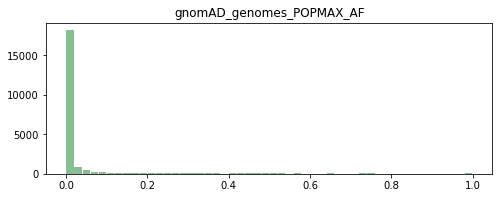

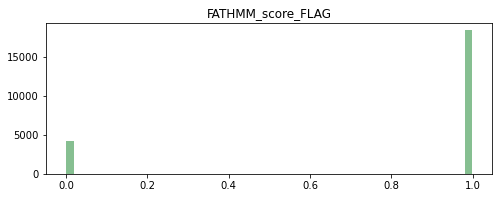

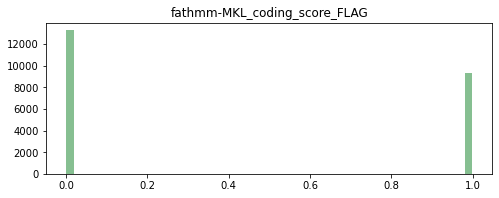

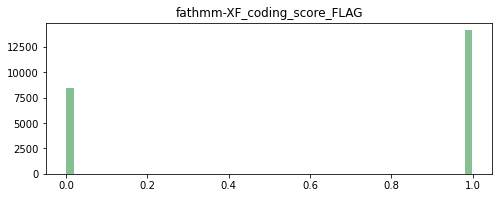

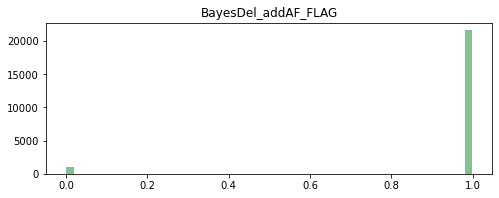

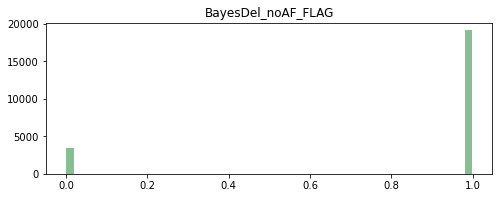

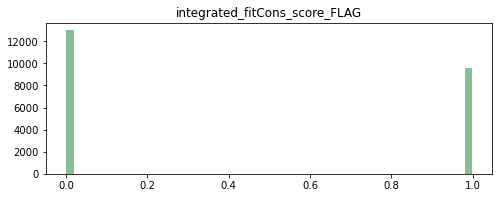

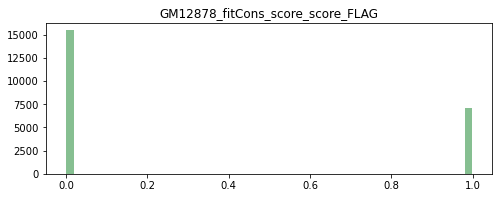

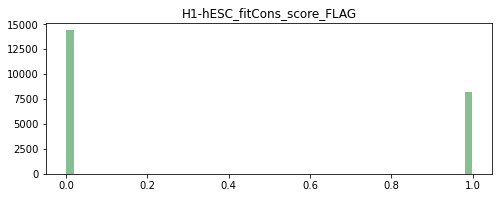

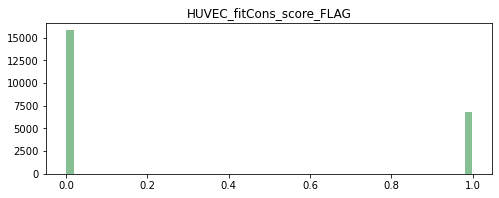

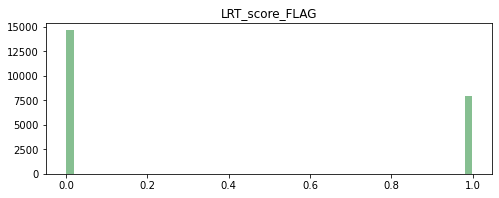

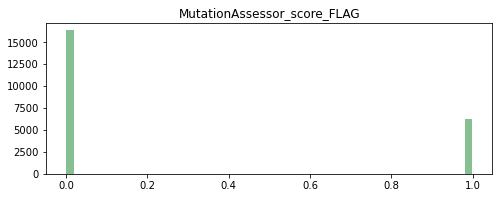

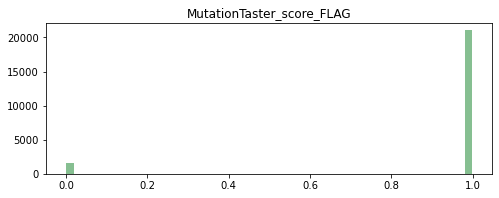

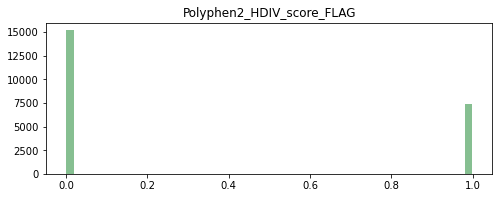

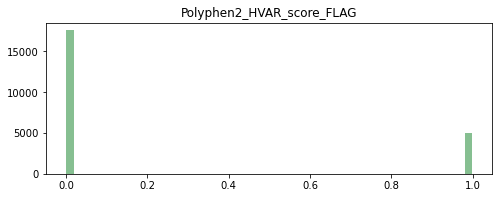

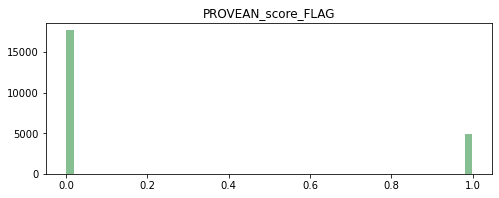

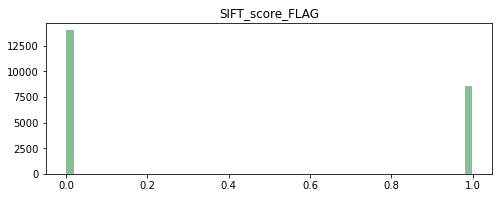

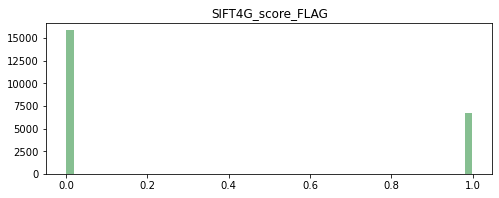

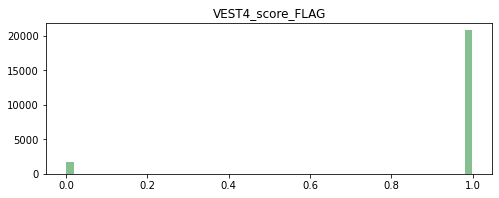

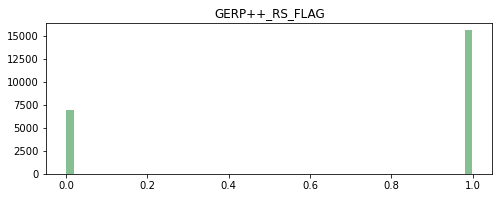

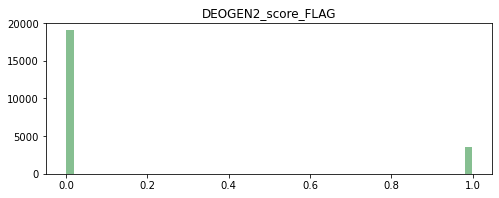

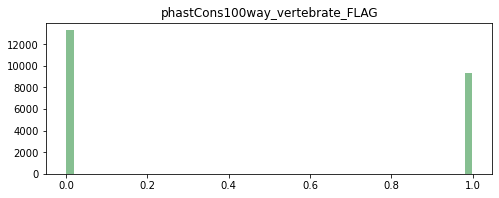

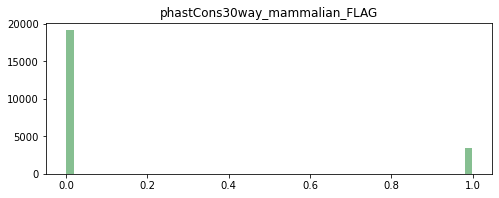

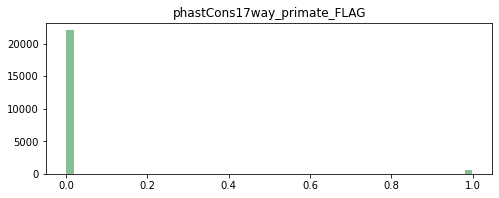

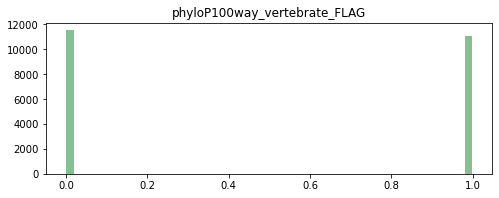

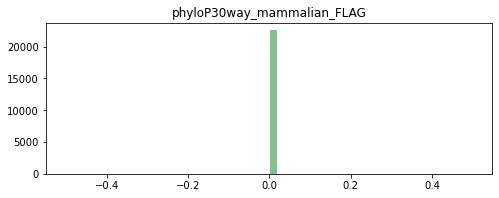

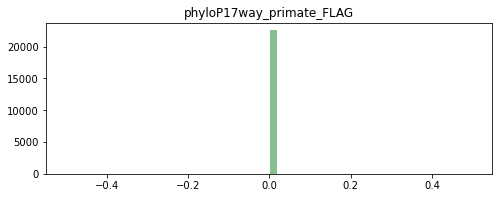

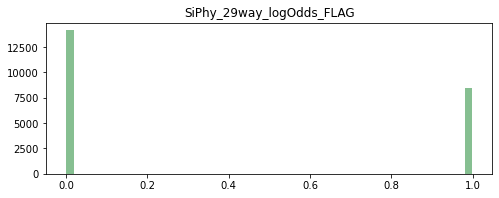

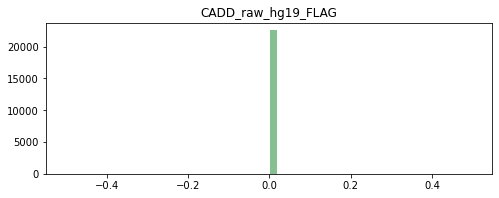

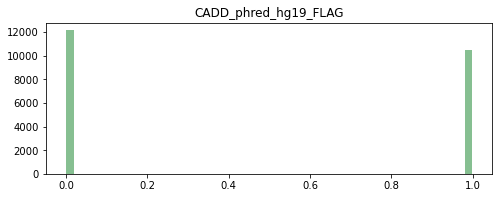

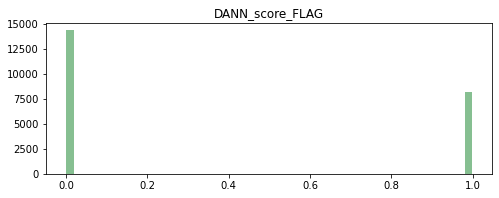

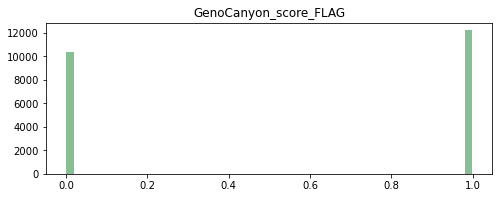

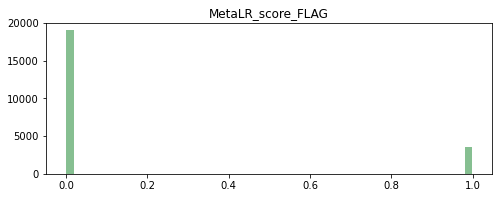

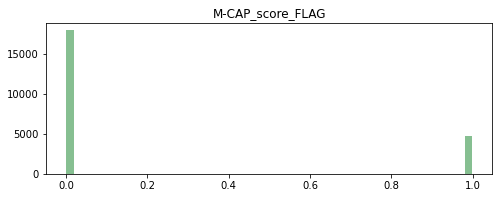

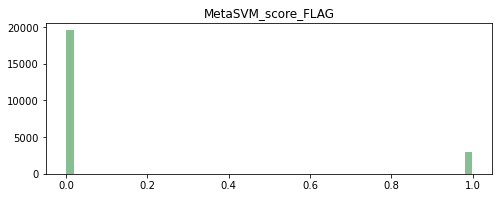

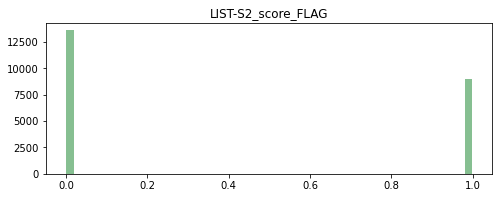

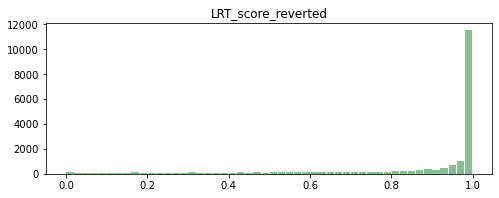

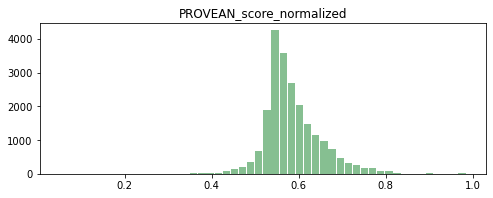

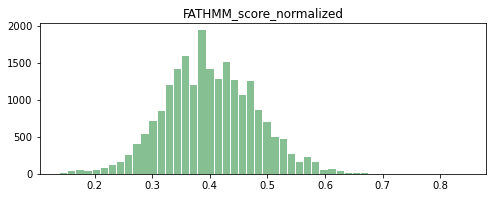

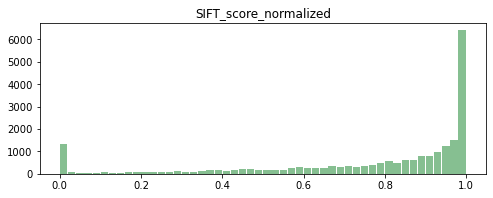

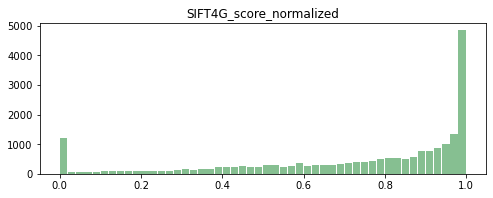

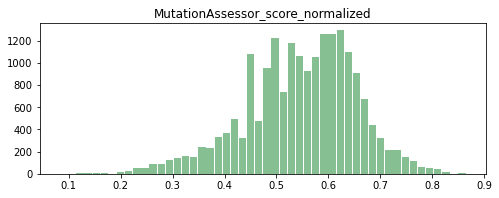

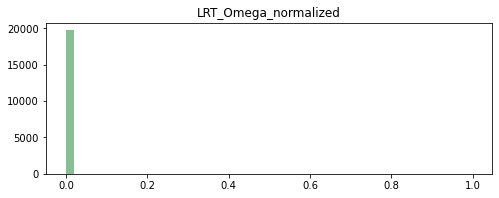

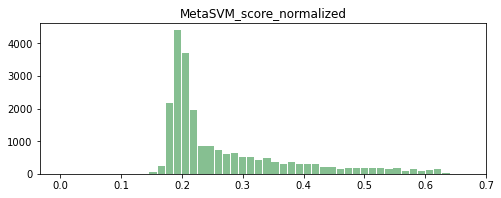

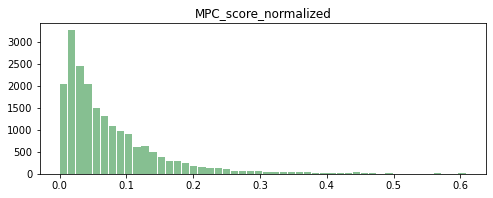

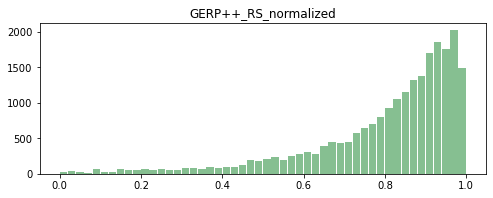

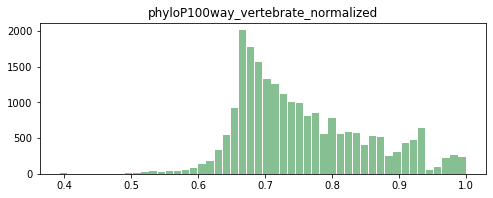

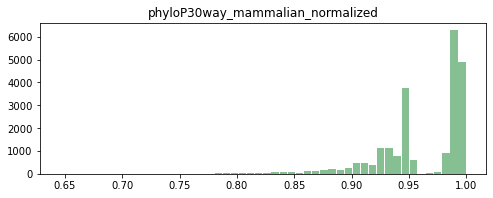

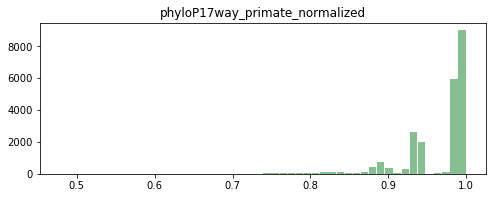

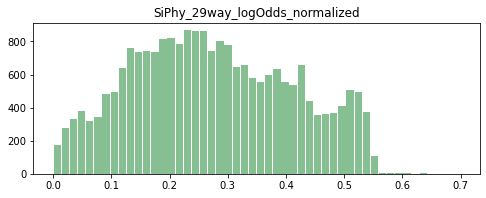

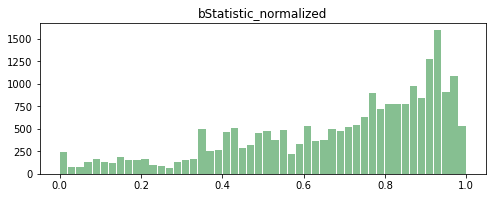

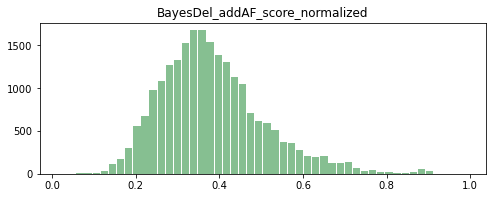

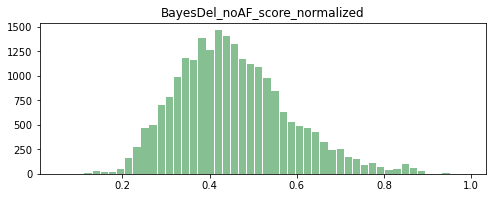

In [15]:
histograms_benign = {}

for col in df1.select_dtypes(include=np.number).columns:
    ax = df1.hist(column= col, bins=50, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)
    histograms_benign[col] = ax
    plt.savefig(fname="imgs/histograms/benign/" + col)

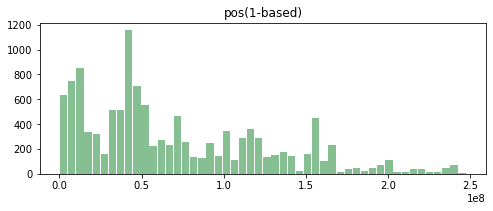

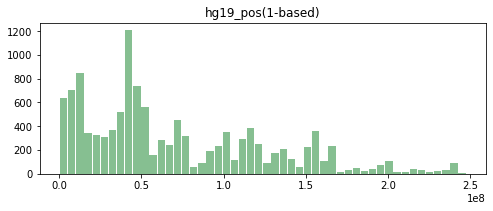

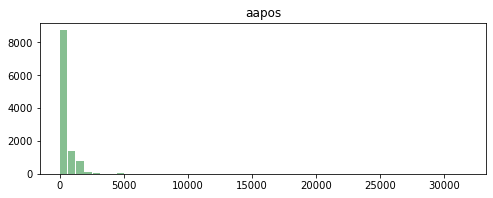

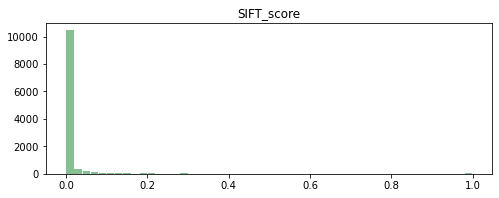

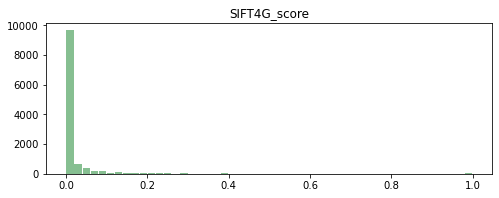

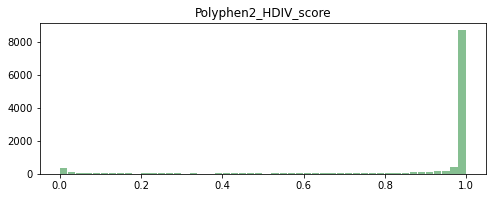

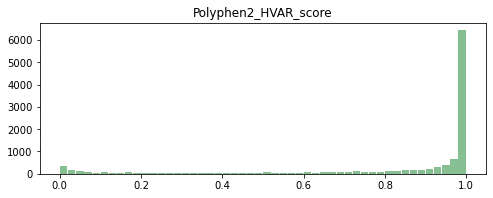

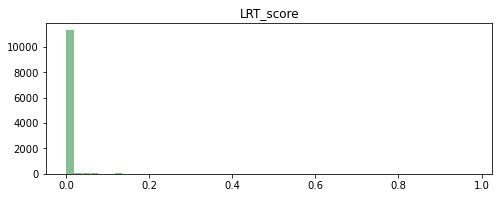

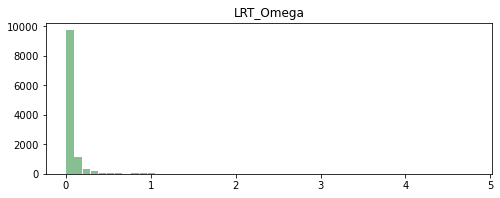

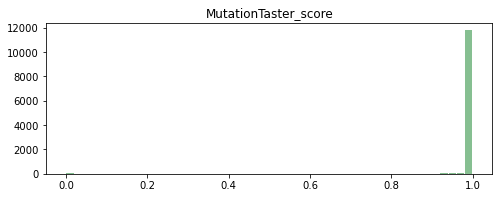

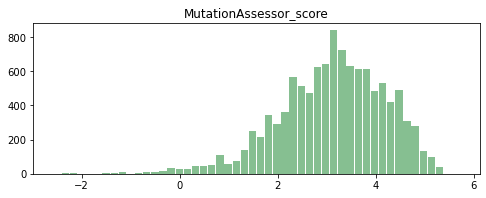

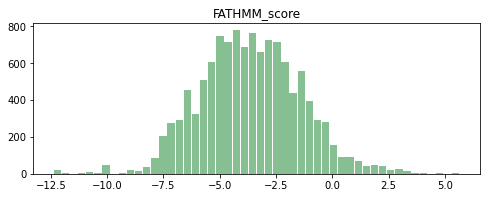

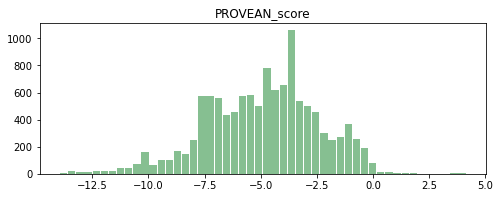

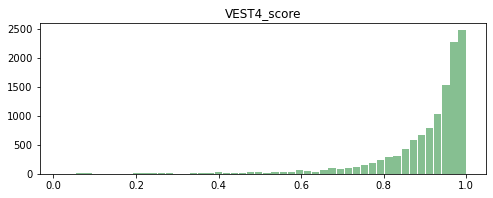

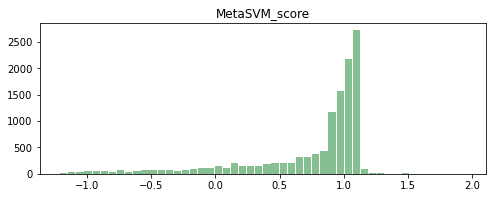

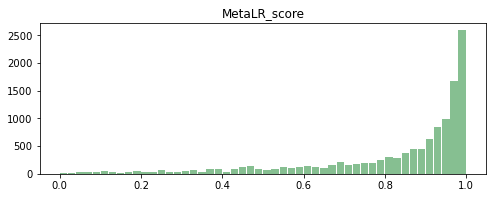

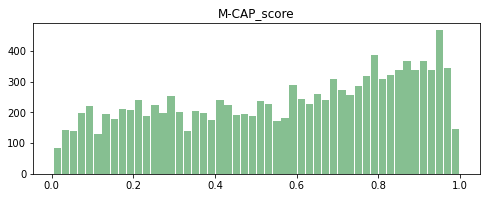

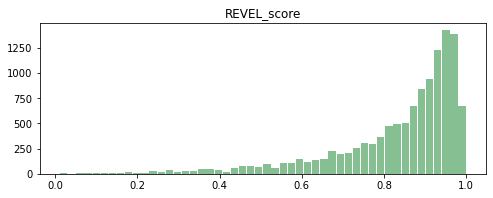

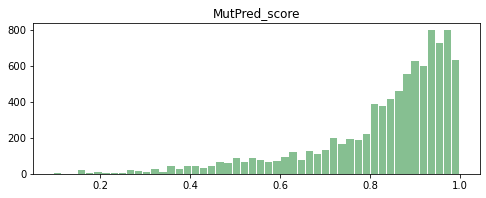

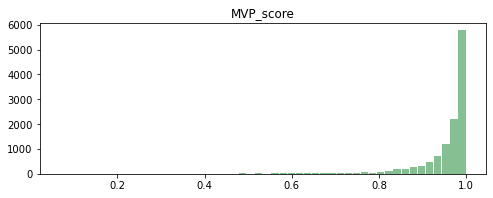

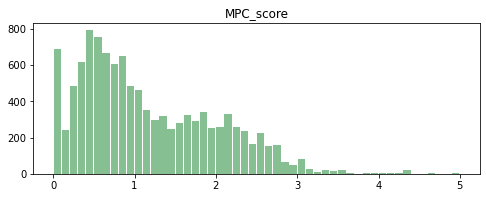

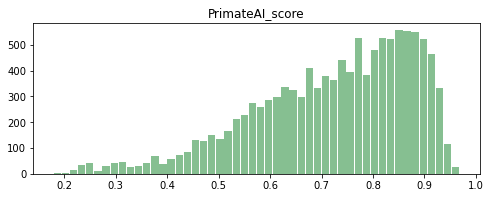

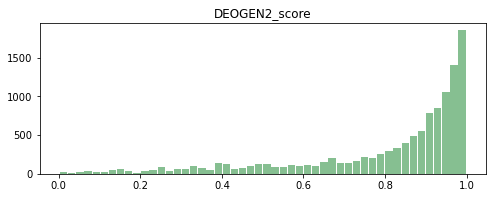

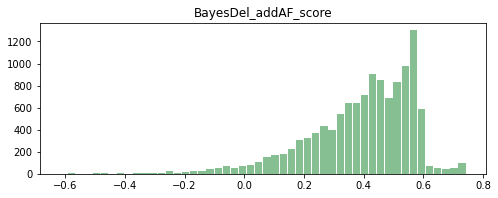

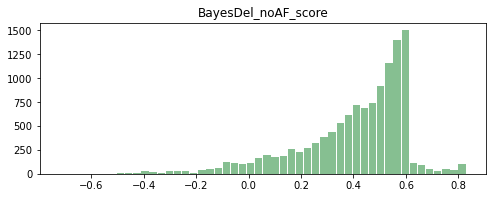

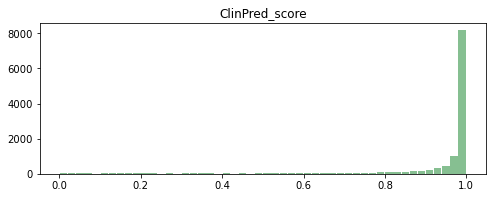

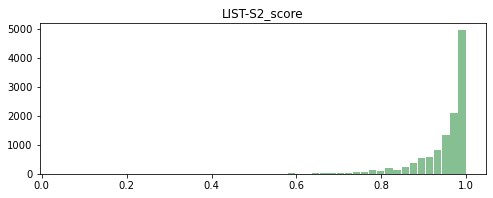

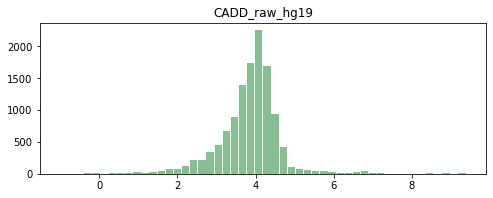

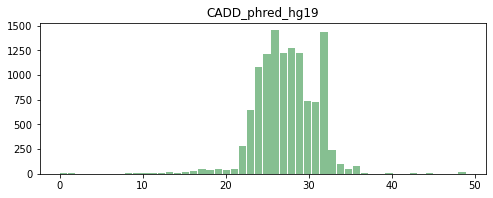

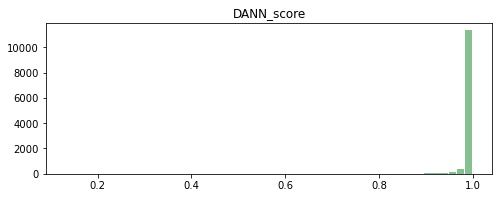

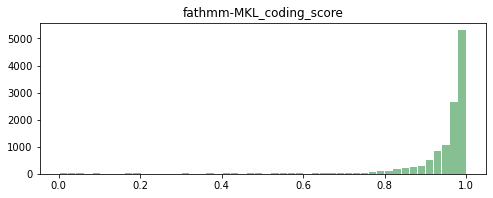

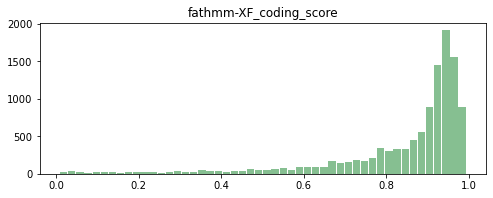

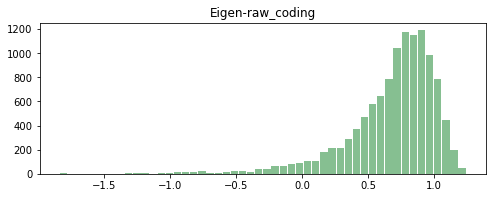

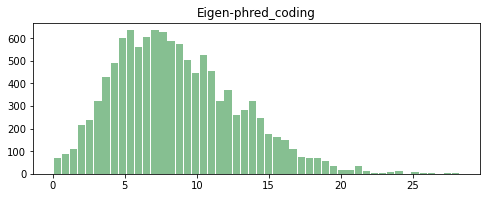

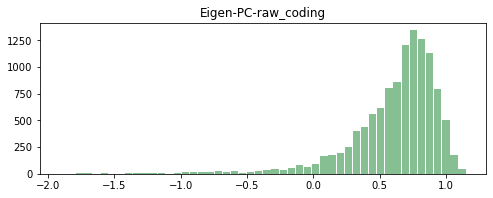

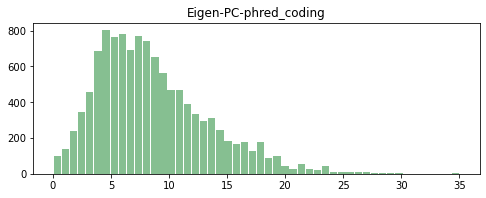

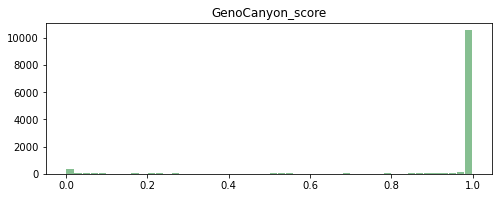

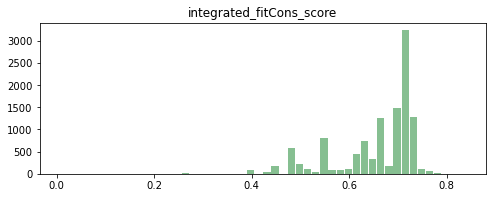

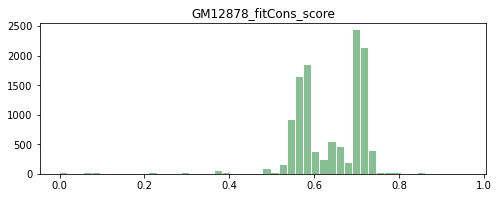

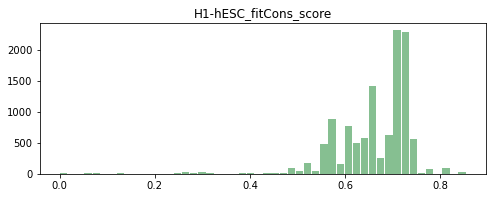

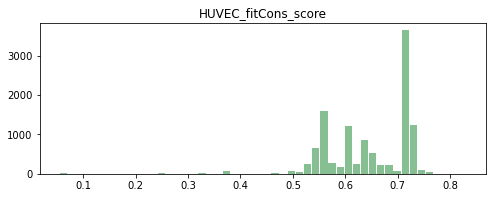

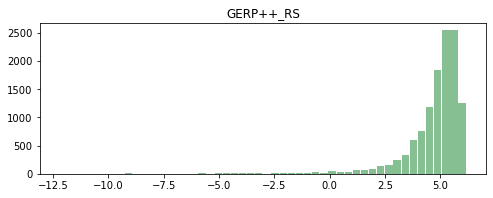

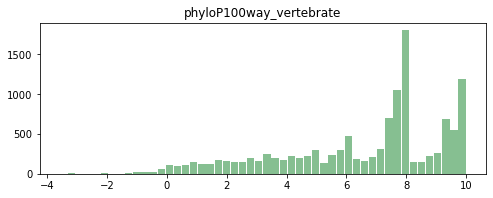

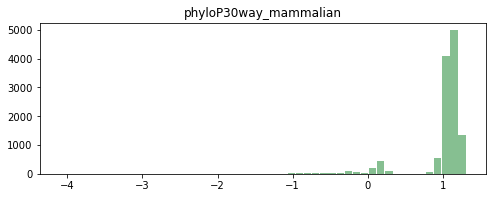

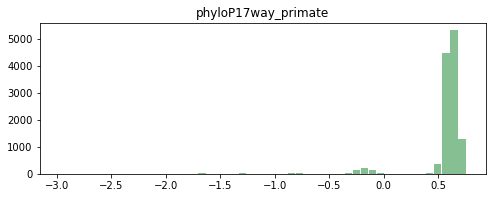

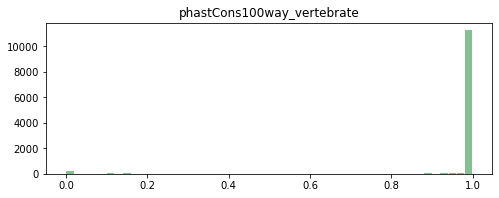

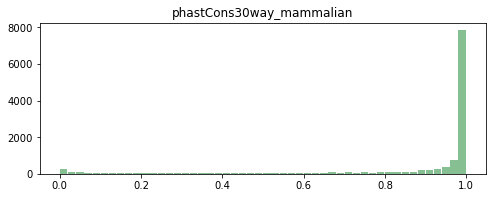

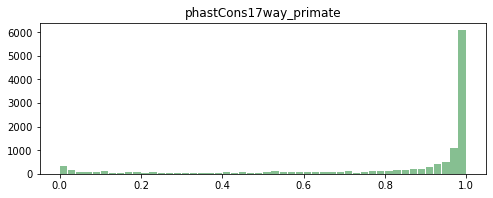

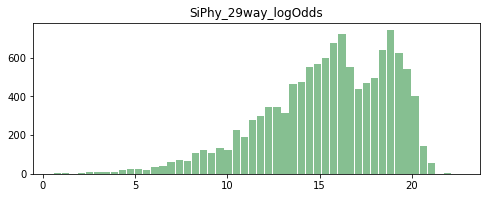

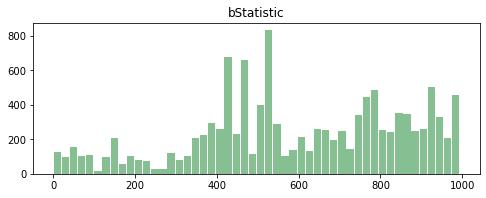

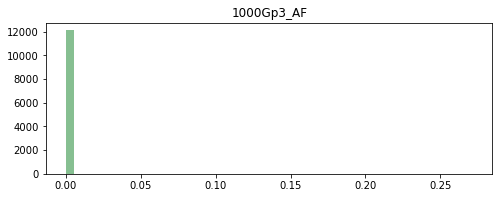

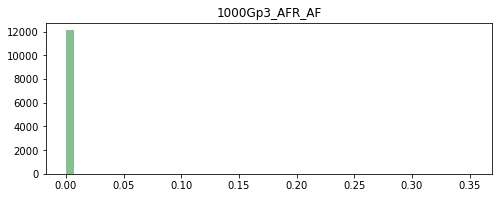

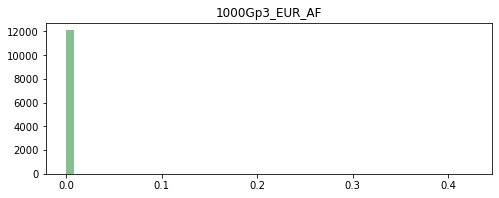

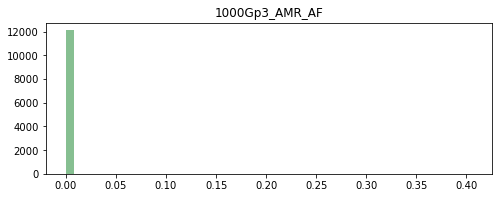

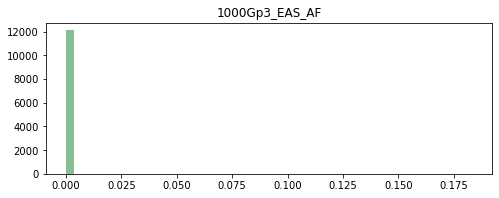

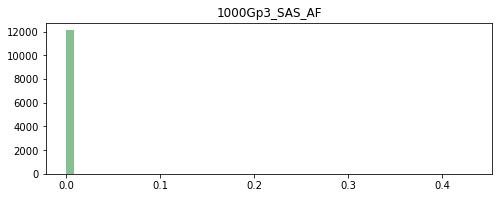

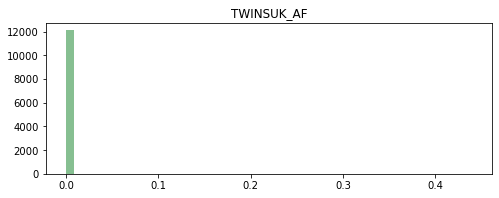

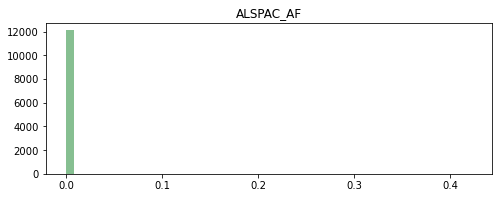

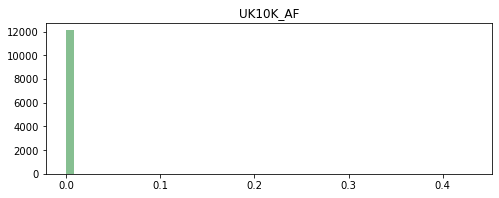

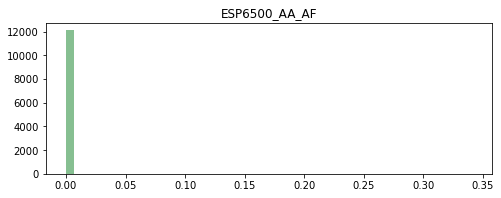

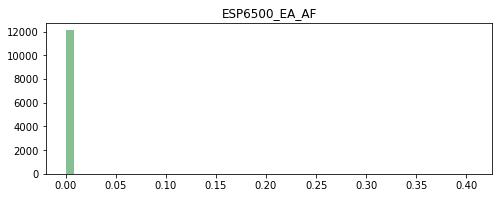

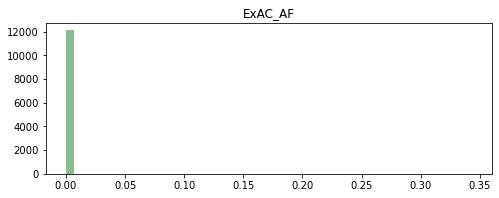

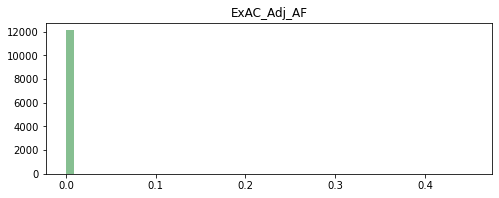

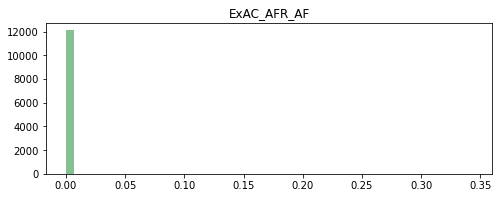

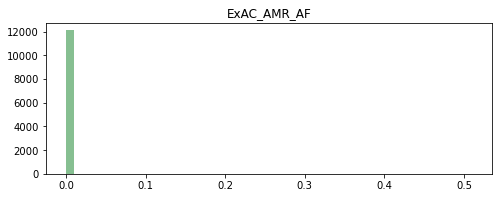

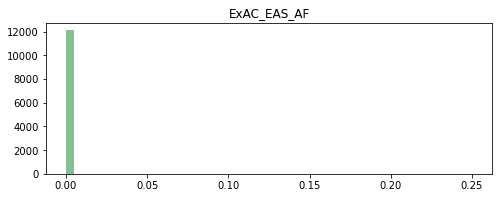

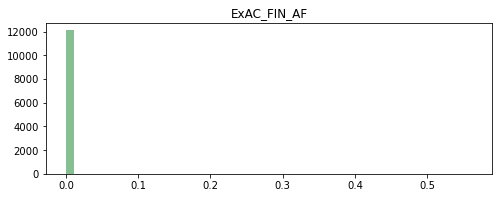

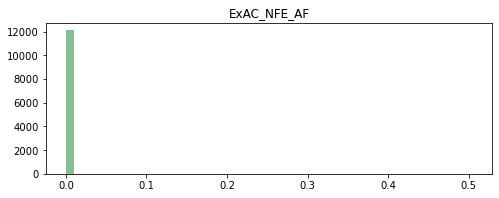

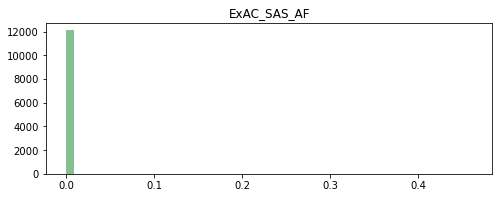

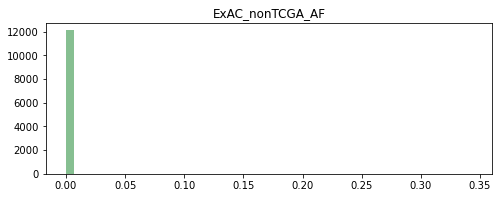

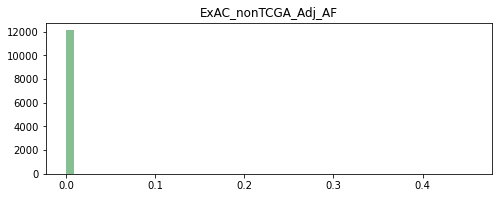

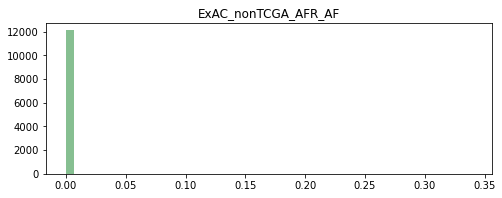

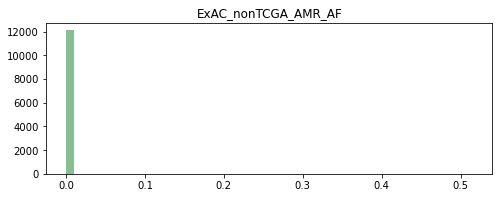

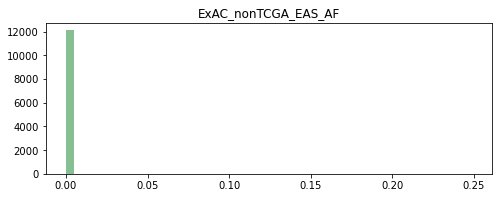

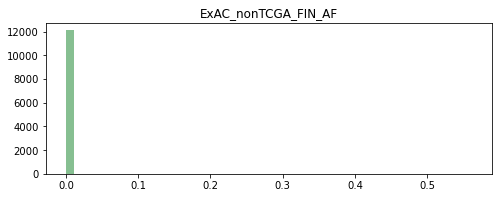

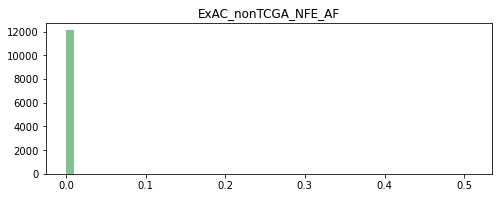

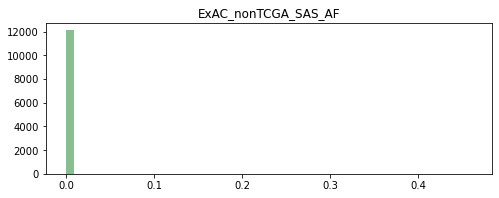

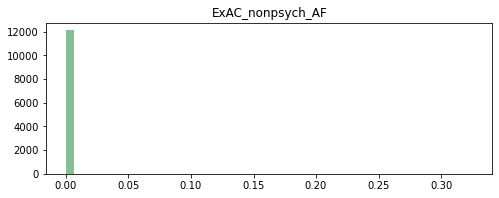

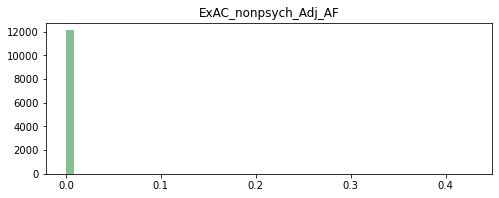

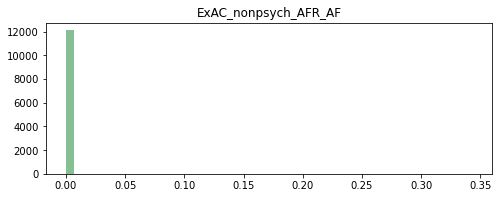

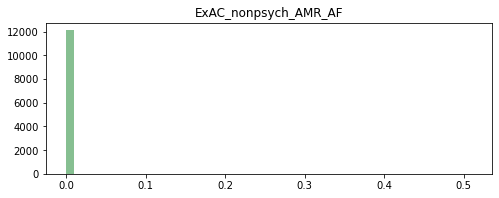

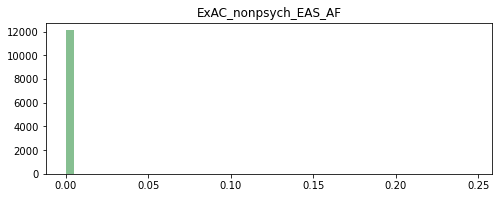

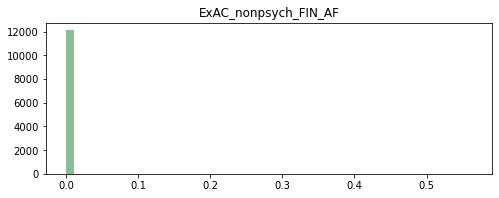

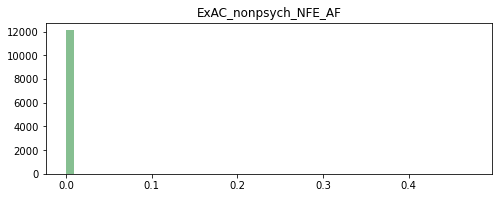

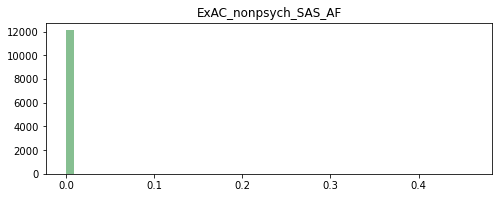

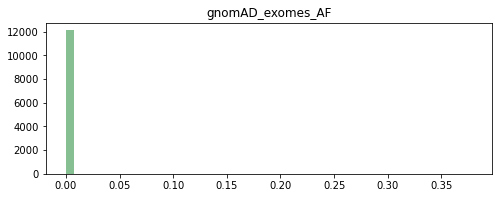

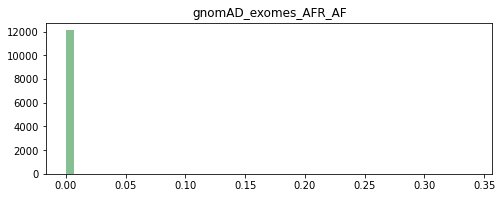

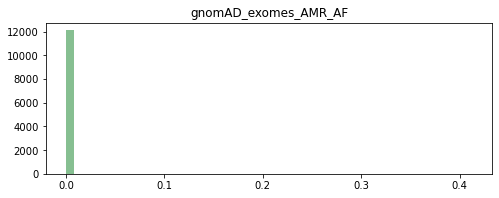

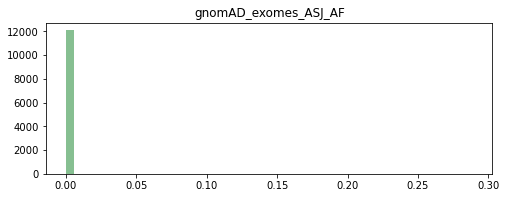

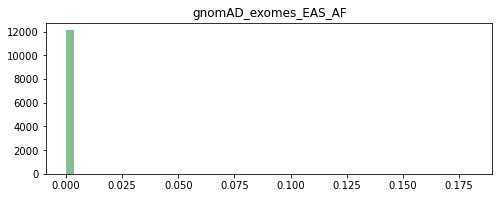

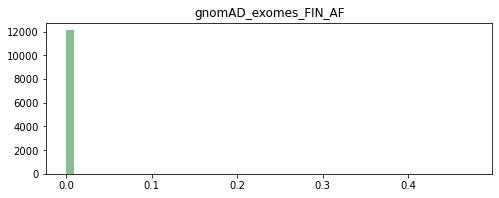

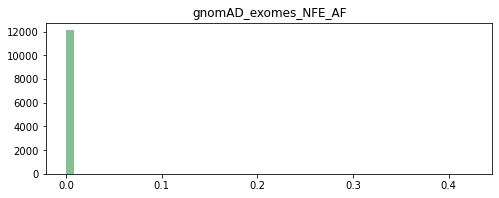

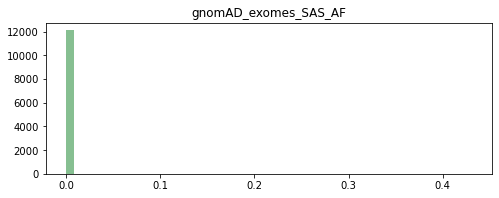

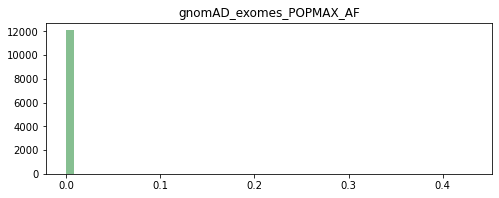

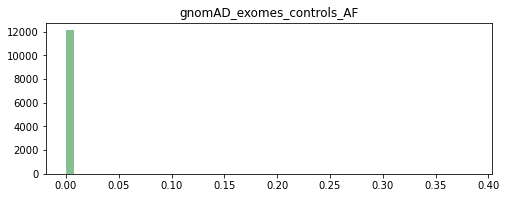

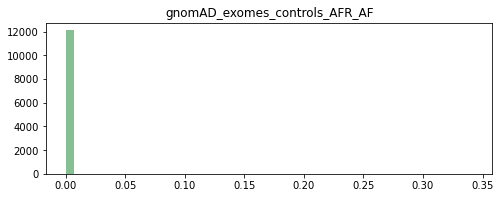

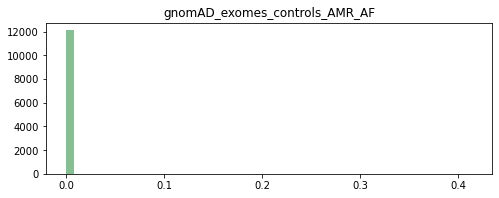

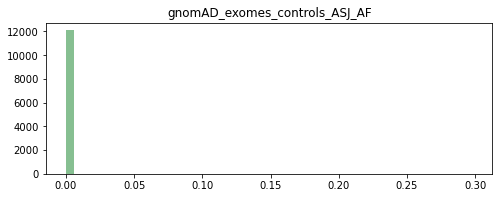

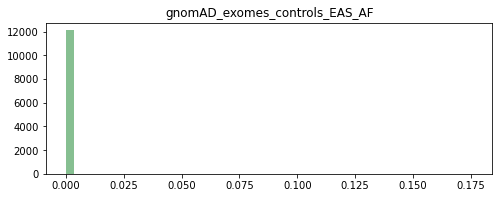

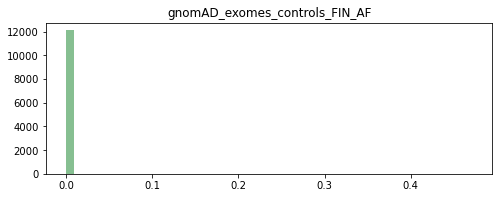

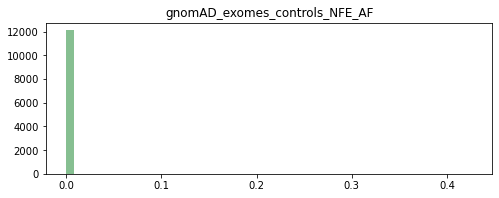

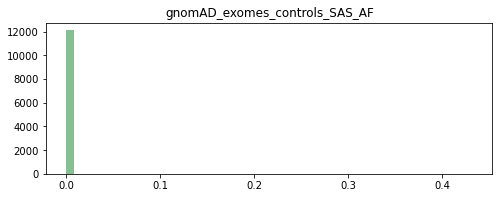

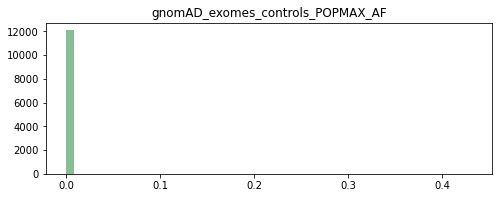

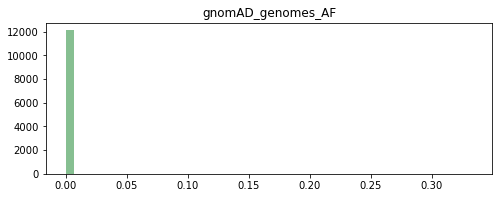

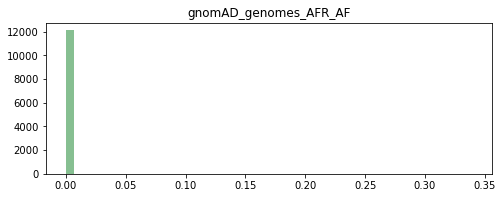

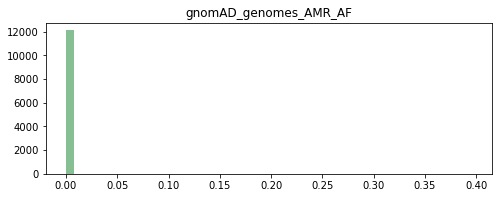

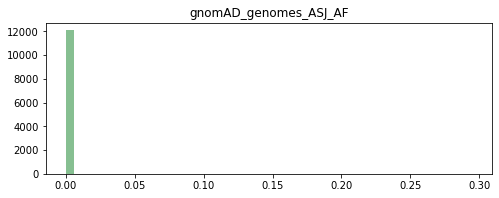

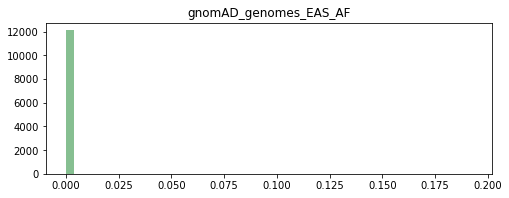

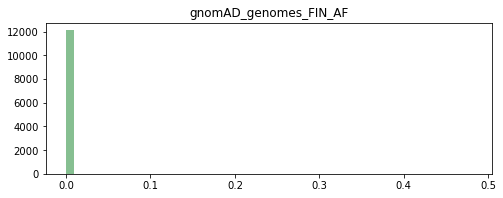

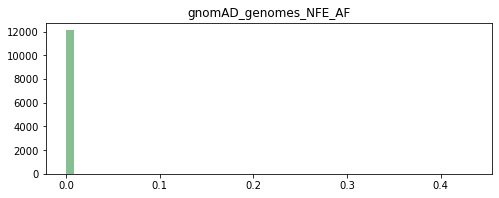

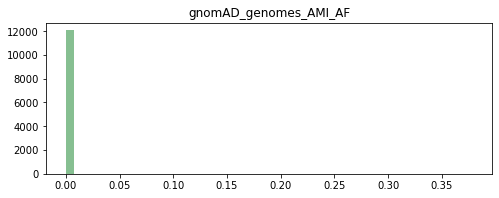

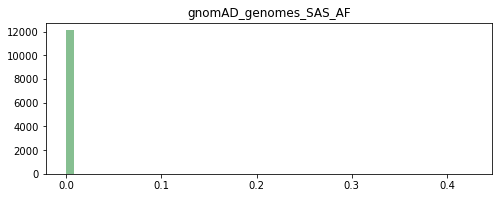

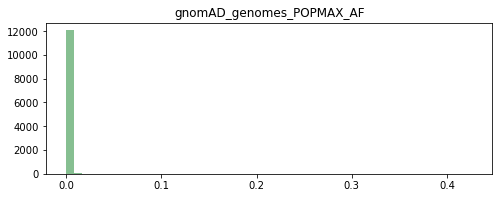

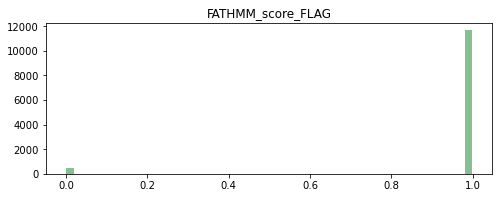

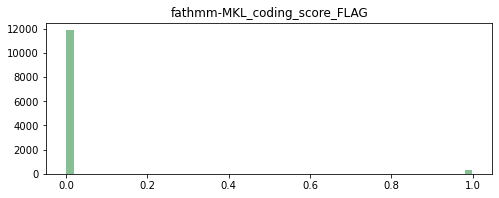

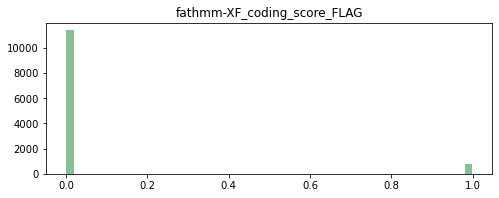

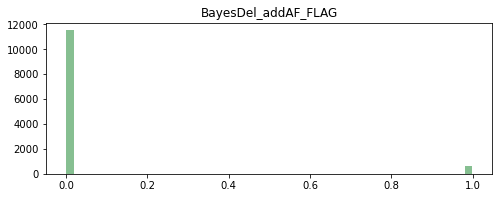

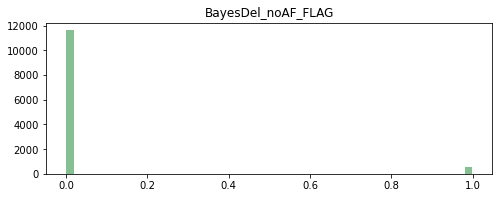

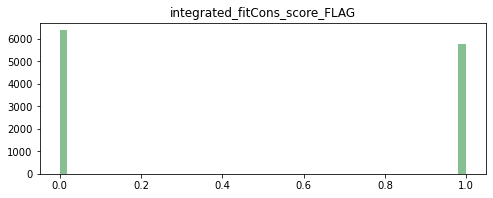

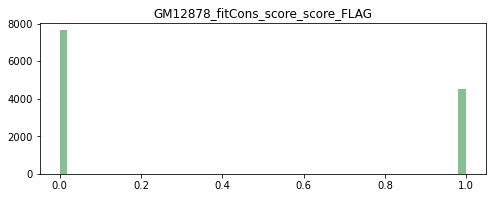

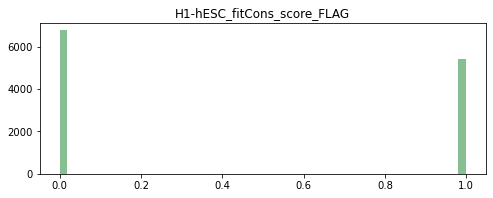

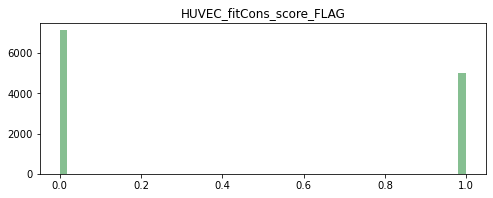

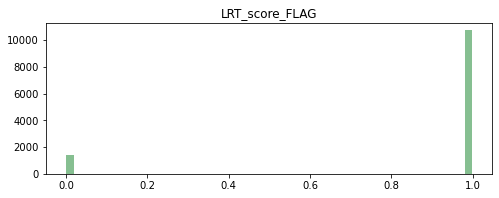

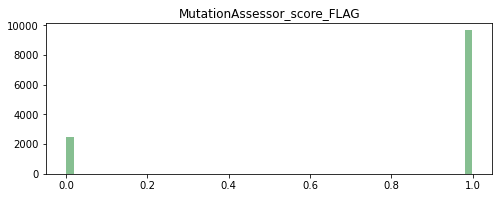

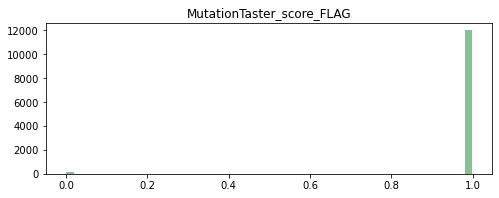

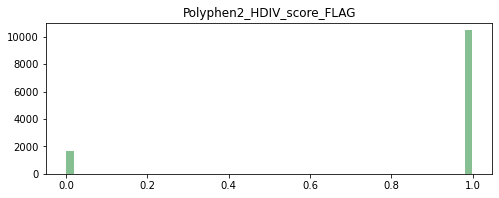

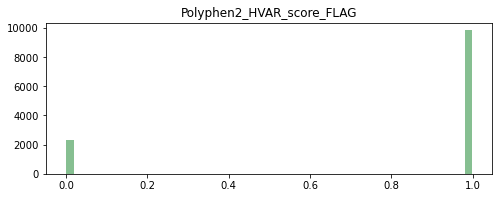

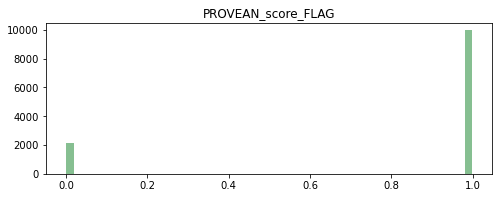

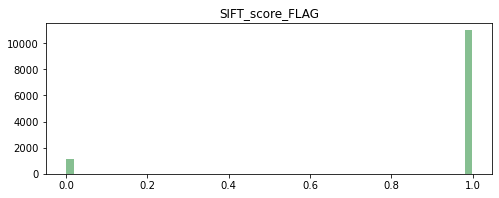

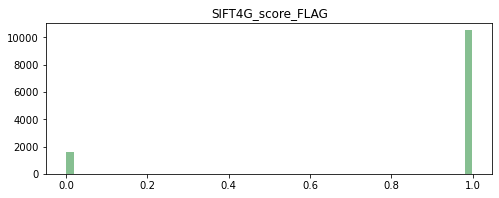

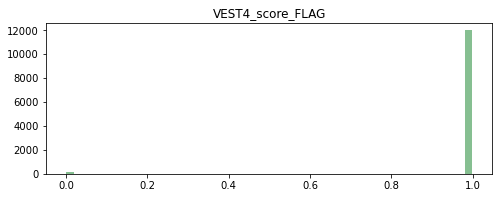

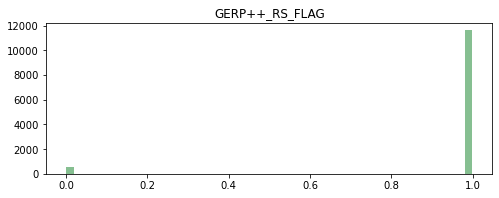

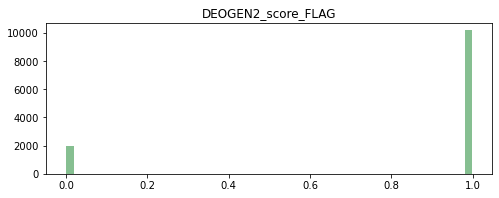

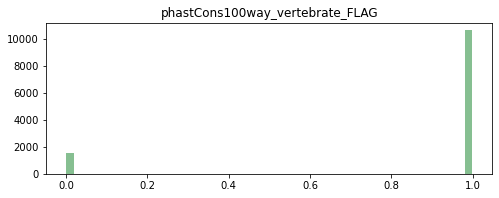

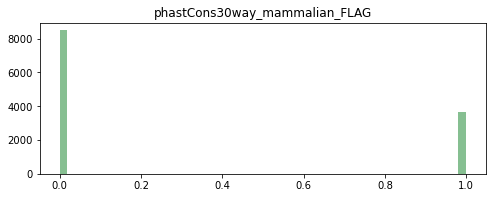

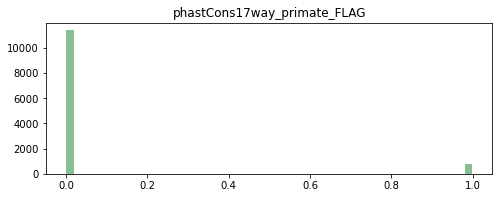

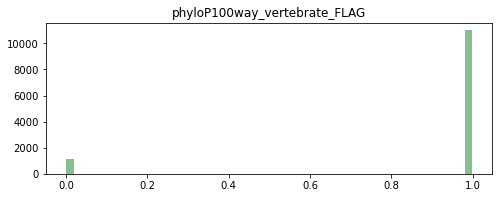

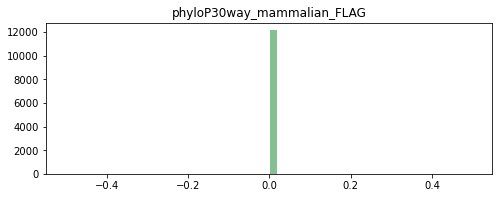

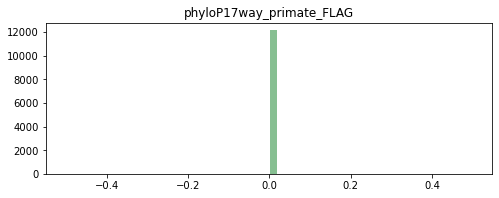

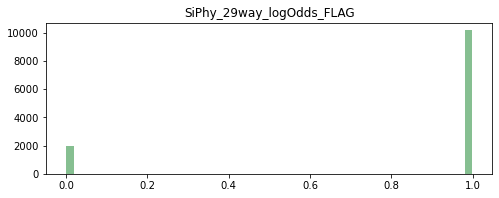

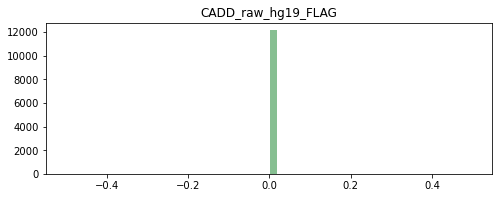

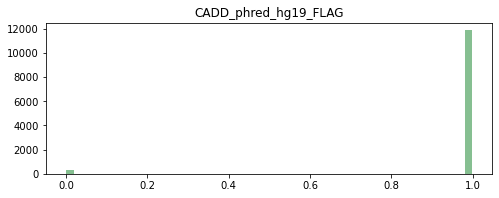

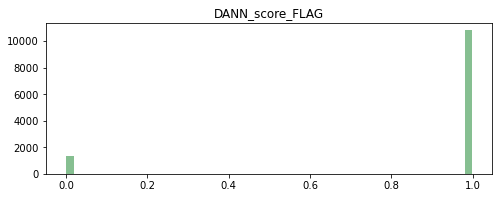

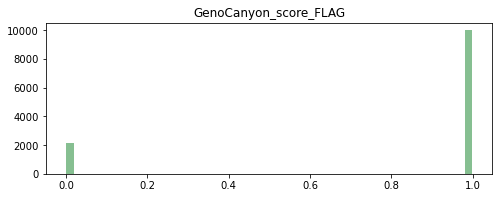

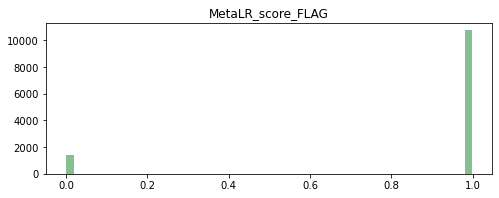

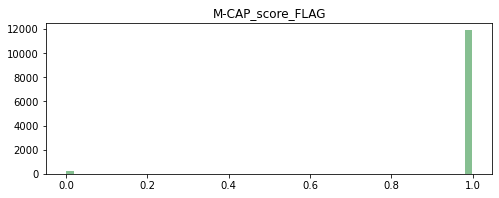

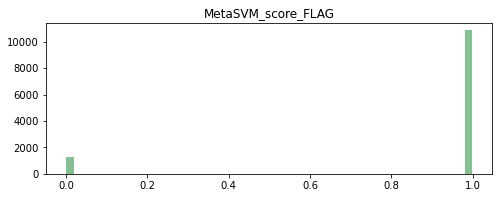

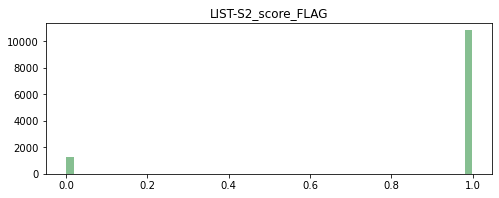

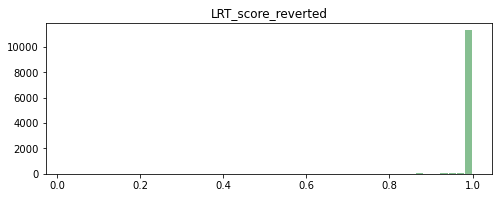

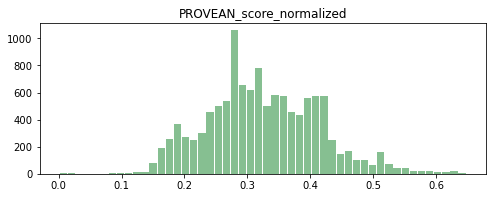

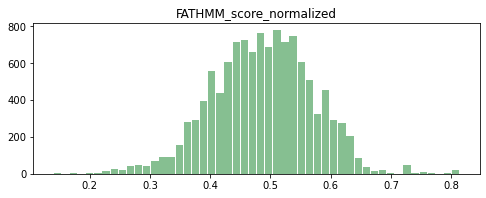

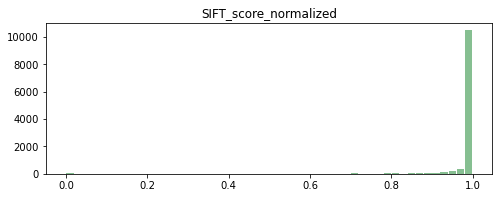

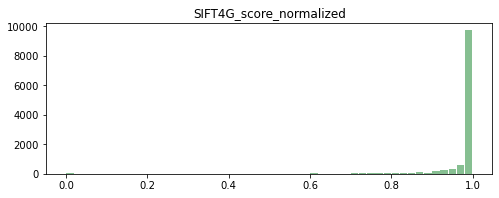

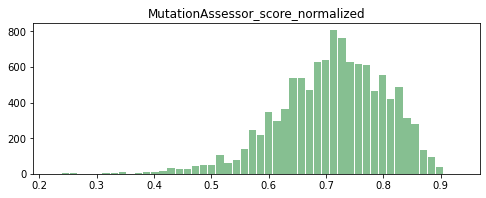

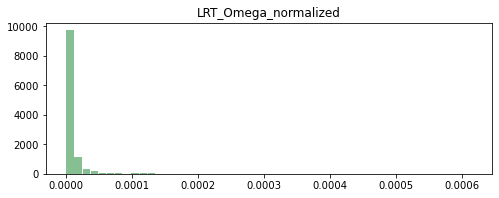

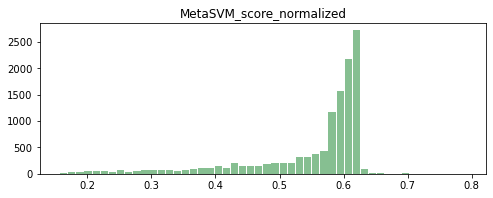

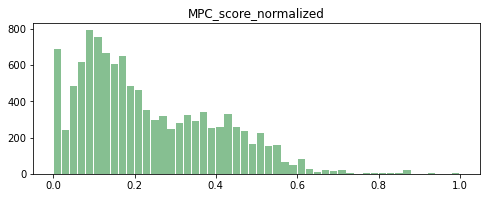

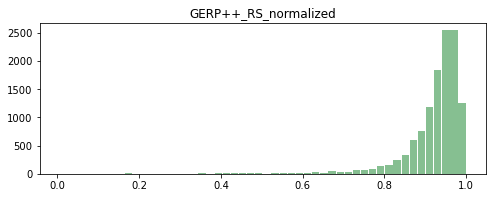

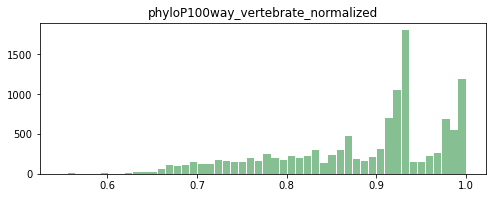

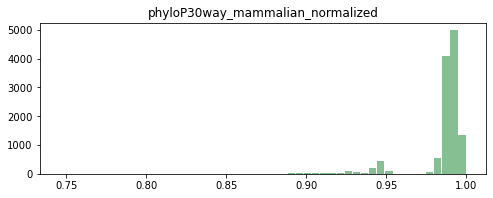

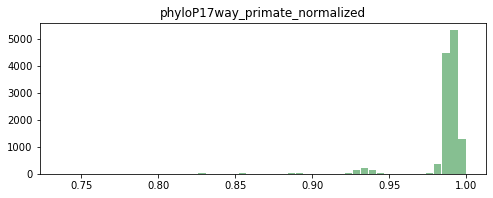

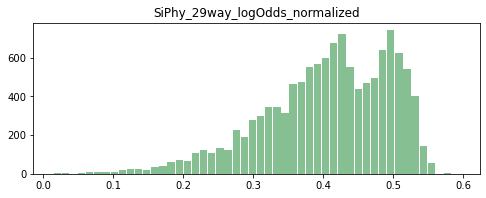

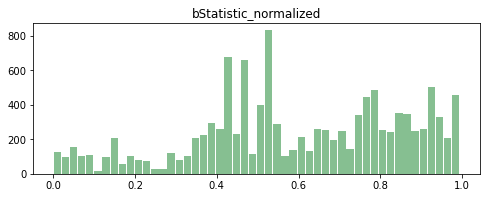

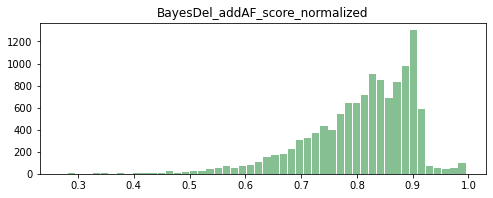

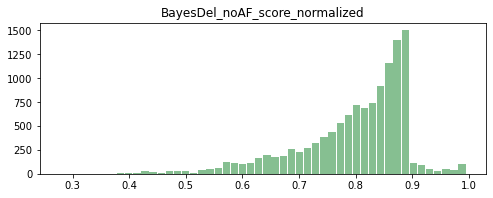

In [16]:
histograms_patho = {}

for col in df2.select_dtypes(include=np.number).columns:
    ax = df2.hist(column= col, bins=50, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)
    histograms_patho[col] = ax
    plt.savefig(fname="imgs/histograms/pathogenic/" + col)

### Distribución de los valores en las columnas 'FLAG'

Vamos a comprobar el porcentaje de benignos versus patógenos por cada dataset en las columnas '_FLAG'

In [17]:
def getZerosAndOnes(df,col):
    return dict(df[col].value_counts()) 

columns = [x for x in df1.columns if '_FLAG' in x]
print("===========================================================")
print("                          Benign")
print("===========================================================")

for col in columns:
    values = getZerosAndOnes(df1,col)
    if len(values) == 2:
        suma = values[0]+ values[1]
        print(col + " --> % de 0: " + str(round(((values[0]/suma)*100),2)) + ", % de 1: " + str(round(((values[1]/suma)*100),2)))
    else:
        if 0 in values:
            print(col + " --> % de 0: 100% ")
        else:
            print(col + " --> % de 1: 100% ")
print("===========================================================")
print("                            Patho")
print("===========================================================")

for col in columns:
    values = getZerosAndOnes(df2,col)
    if len(values) == 2:
        suma = values[0]+ values[1]
        print(col + " --> % de 0: " + str(round(((values[0]/suma)*100),2)) + ", % de 1: " + str(round(((values[1]/suma)*100),2)))
    else:
        if 0 in values:
            print(col + " --> % de 0: 100% ")
        else:
            print(col + " --> % de 1: 100% ")

                          Benign
FATHMM_score_FLAG --> % de 0: 18.39, % de 1: 81.61
fathmm-MKL_coding_score_FLAG --> % de 0: 58.76, % de 1: 41.24
fathmm-XF_coding_score_FLAG --> % de 0: 37.32, % de 1: 62.68
BayesDel_addAF_FLAG --> % de 0: 4.28, % de 1: 95.72
BayesDel_noAF_FLAG --> % de 0: 15.19, % de 1: 84.81
integrated_fitCons_score_FLAG --> % de 0: 57.55, % de 1: 42.45
GM12878_fitCons_score_score_FLAG --> % de 0: 68.46, % de 1: 31.54
H1-hESC_fitCons_score_FLAG --> % de 0: 63.69, % de 1: 36.31
HUVEC_fitCons_score_FLAG --> % de 0: 69.94, % de 1: 30.06
LRT_score_FLAG --> % de 0: 64.84, % de 1: 35.16
MutationAssessor_score_FLAG --> % de 0: 72.38, % de 1: 27.62
MutationTaster_score_FLAG --> % de 0: 6.79, % de 1: 93.21
Polyphen2_HDIV_score_FLAG --> % de 0: 67.24, % de 1: 32.76
Polyphen2_HVAR_score_FLAG --> % de 0: 77.88, % de 1: 22.12
PROVEAN_score_FLAG --> % de 0: 78.32, % de 1: 21.68
SIFT_score_FLAG --> % de 0: 61.99, % de 1: 38.01
SIFT4G_score_FLAG --> % de 0: 70.22, % de 1: 29.78
VEST4

Comportamientos anómalos en las FLAG:


- MutationTaster_score_FLAG tiene un  93.25% de 1 en el dataset benigno, y VEST4_score_FLAG un 89.78%


- CADD_raw_hg19_FLAG tiene un 100% de 0s, fathmm-MKL_coding_score_FLAG un 97.35%, fathmm-XF_coding_score_FLAG un 92.0%, BayesDel_addAF_FLAG un 93.73%, BayesDel_noAF_FLAG un 95.43%.

Vamos a comprobar qué FLAG tienen resultados más cercanos entre si. 

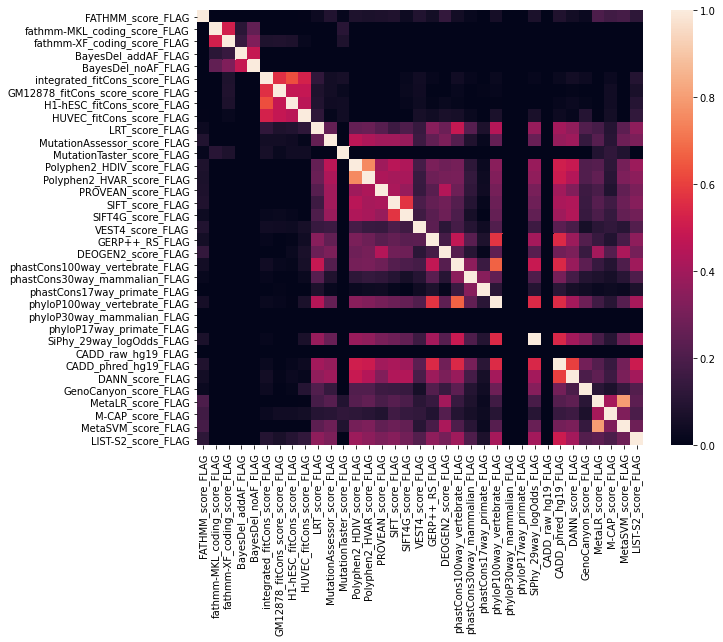

In [18]:
columns = [x for x in df1.columns if '_FLAG' in x]

f, ax = plt.subplots(figsize=(10, 8))
corr = df1[columns].corr().fillna(0)
a = sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, vmin=0, vmax=1)
a.get_figure().savefig("imgs/heatmaps/benignFlag.png")

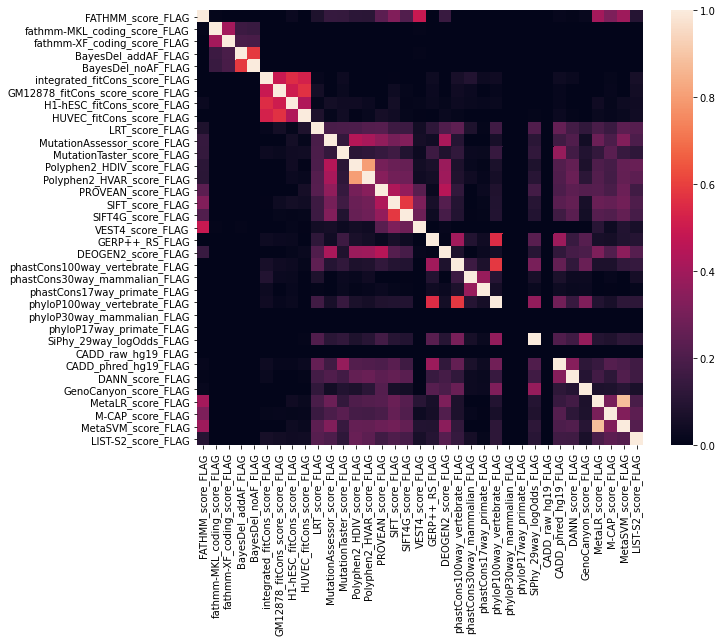

In [19]:
columns = [x for x in df1.columns if '_FLAG' in x]

f, ax = plt.subplots(figsize=(10, 8))
corr = df2[columns].corr().fillna(0)
a = sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, vmin=0, vmax=1)
a.get_figure().savefig("imgs/heatmaps/pathoFlag.png")

Parece como si no existiera una correlación entre los diferentes FLAGs, aunque la correlación aumenta en el primer dataset. Existe una correlación entre los Bayes, los FitCons, los polyphen, MetaLR y MetaSVM.

### Histogramas de las columnas 'score'

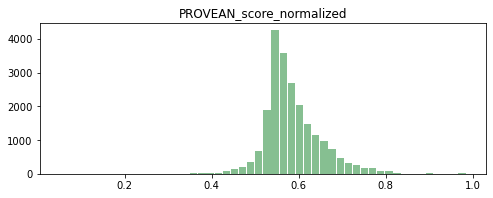

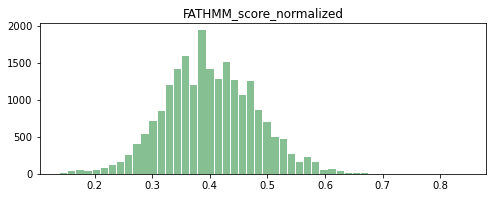

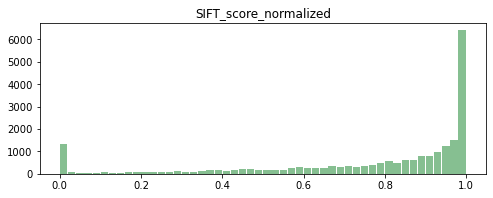

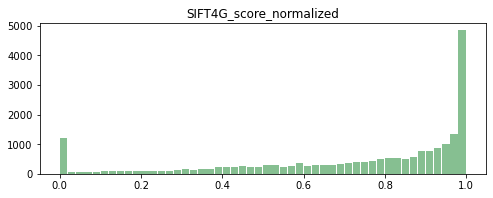

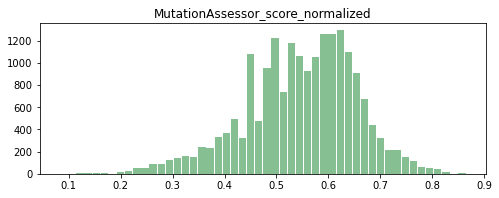

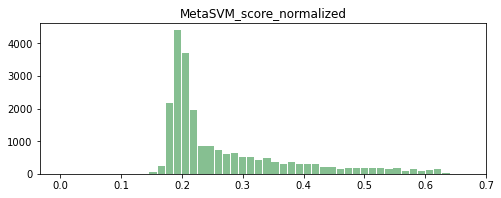

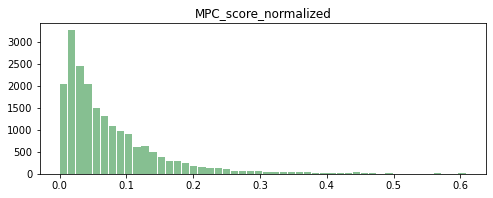

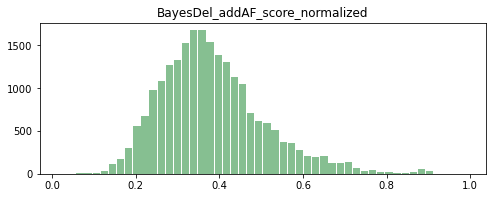

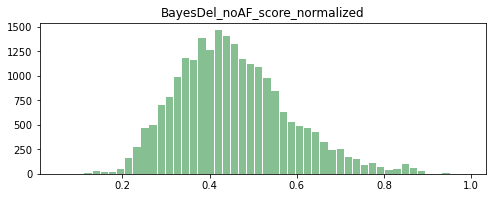

In [20]:
result = [x for x in df1.columns if 'score' in x and '_FLAG' not in x and 'normalized' in x]
for col in result:
    ax = df1.hist(column= col, bins=50, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)


Comprobemos los datos de las columnas 'Score' para el dataset 1:

    - SIFT, SIFT4G, Polyphen2_HDIV, Polyphen2_HVAR, ClinPred, GenoCanyon_score son bimodales, tienen concentrados la mayor parte de los datos alrededor del 0 y del 1. (más datos cerca del 1 que del 0).
    - LRT_score, MetaLR_score, M-CAP_score tiene casi todos los datos cerca del 0.
    - MutationTaster_score es bimodal, pero tienen casi todos los datos cerca del 1.
    - MutationAssesor_score, LIST-S2_score tienen una distribución asimétrica hacia la derecha.
    - FATHMM_score, PrimateAI_score, BayesDel_addAF_score, BayesDel_noAF_score tiene una distribución asimétrica hacia la izquierda.
    - PROVEAN_score tiene una distribución casi simétrica leptocúrtica.
    - VEST4_score, REVEL_score, MPC_score, DEOGEN2_score, ClinPred_score, fathmm-XF_coding_score tienen una distribución muy asimétrica hacia la izquierda.
    - DANN_score tiene una distribución muy asimétrica hacia la derecha.
    - MetaSVM_score tiene una distribución asimétrica hacia la izquierda leptocúrtica.
    - MutPred_score no tiene una distribución regular, aunque se asemeja a una asimétrica hacia la izquierda.
    - MVP_Score tiene una distribución más o menos equiprobable, aunque con una tendencia más cercana al 1.
    - fathmm-MKL_coding_score es bimodal, tienen concentrados la mayor parte de los datos alrededor del 0 y del 1 pero homogéneamente.
    - integrated_fitCons_score, GM12878_fitCons_score, H1-hESC_fitCons_score, HUVEC_fitCons_score no tiene una distribución muy regular, aunque la mayor parte de los datos se concentran entre el 0.45 y el 0.75
    - HIPred_score tiene una distribución irregular, aunque tiene una mayor cantidad de valores entorno al 0.55


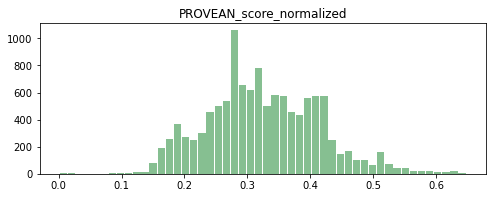

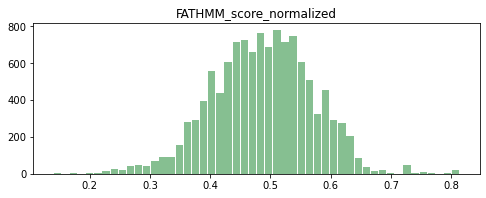

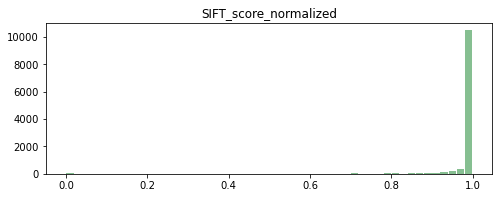

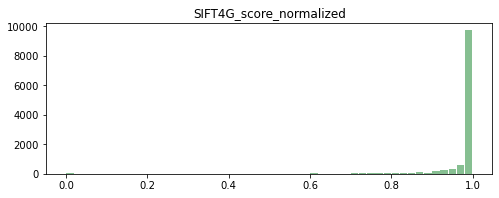

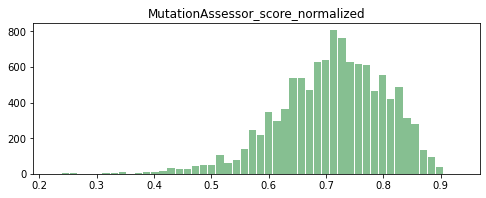

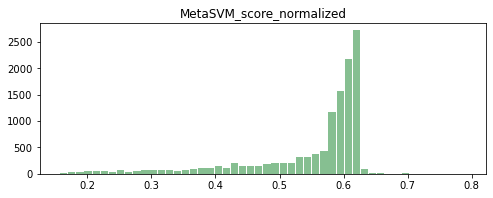

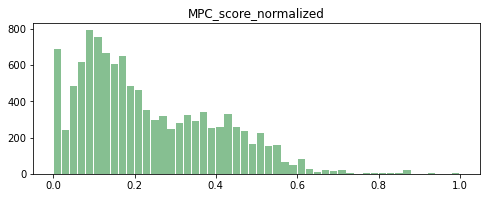

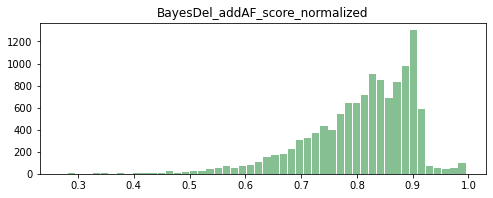

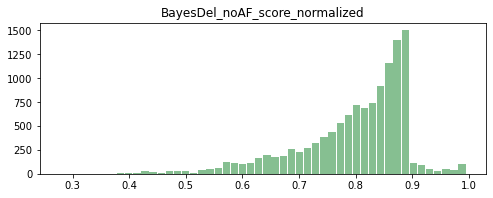

In [21]:
result = [x for x in df1.columns if 'score' in x and '_FLAG' not in x and 'normalized' in x]
for col in result:
    ax = df2.hist(column= col, bins=50, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)


Comprobemos los datos de las columnas 'Score' para el dataset 2:
    
- SFT_score, SIFT4G_score, MutationTaster_score, MVP_score, VEST4_score, MetaLR_score, REVEL_score, MutPred_score, ClinPred_score, LIST-S2_score, DANN_score, fathmm-MKL_coding_score, GenoCanyon_score tienen casi todos los valores cercanos al 1.


- Polyphen2_HDIV_score, Polyphen2_HVAR_score, LRT_score tienen casi todos los valores cercanos al 0.


- FATHMM_score tiene la forma de una distribución normal.


- MutationAssessor_score tiene la forma de una distribución normal ligeramente centrada hacia la derecha.


- PROVEAN_score tiene una forma cercana a una distribución normal.


- M-CAP_score tiene una distribución más homogénea, aunque hay un ligero mayor número de valores cerca del 1.


- MPC_score tiene los valores distribuídos en pendiente descendiente, con la mayor concentración cercana al 0.


- PrimateAI_score, BayesDel_addAF_score, BayesDel_noAF_score tienen una distribución normal muy asimétrica centrada hacia la derecha (con casi todos los valores cercanos al 1).


- integrated_fitCons_score, GM12878_fitCons_score, H1-hESC_fitCons_score, HUVEC_fitCons_score, HIPred_score tienen una distribución irregular con casi todos los datos entre 0.6 y 0.75.


##### Vamos a comentar algunas cosas llamativas de algunas variables de los histogramas

- SIFT y SIFT4G, aunque tienen más valores en el 0 dentro del dataset benign, tiene también bastantes valores en el 1.


- LRT tiene en ambos valores cercanos al cero. Vamos a ver qué significa esta variable:
  The original LRT two-sided p-value (LRTori), ranges from 0 to 1.
  Esta variable trabaja con valores cercanos al 0; por debajo de 0.001 se consideran dañinos, por 
  encima se considera tolerables. Hay que saber que el valor p se define como la probabilidad de que 
  un valor estadístico calculado sea posible dada una hipótesis nula cierta, ayudando a diferenciar 
  resultados que son producto del azar del muestreo, de resultados que son estadísticamente 
  significativos.
  
  
- MutationTaster tiene en ambos datasets casi todos los valores cercanos al 1. 
  MutationTaster p-value (MTori), ranges from 0 to 1 (es también un p-value)
  Sin embargo, en este caso, sorprende puesto que nos dan como punto de separación entre benigno y 
  patógeno el valor 0.5, que está muy alejado de la mayor concentración de valores
  
  
- MutationAssessor tiene una distribución similar de valores en ambos datasets. 
  MutationAssessor functional impact combined score (MAori). The score ranges from -5.17 to 6.49 in 
  dbNSFP. En ambos datasets, está bastante centrada a la mitad, aunque en el primer dataset están más 
  centrados en 0.6 y en el segundo en 0.7.
  Si hacemos una 'desnormalización' de estos valores, 0.6 se convierte en 1.82, y 0.7 se convierte en 
  2.99; sabiendo que su separación entre benigno y patógeno se realiza en el valor 1.9, todo parece 
  indicar que funciona correctamente.
  

- Fathmm sufre de un caso similar al anterior. 
  
  
- Provean también sufre un efecto similar. 


- MPC tiene que ser entendido como una probabilidad de suceso, no tiene definido un valor de corte entre benigno y patógeno.


- List-S2 tiene el valor de corte en 0.85, por lo que funciona correctamente. 


- DANN tiene el valor de corte en 0.99, por lo que también funciona correctamente.


- GenoCanyon sorprende en el dataset de benigno porque tiene un número elevador de valores en 1.


- las variables fitCons tiene una distribución exactamente igual en ambos datasets.
  Las variables fitCons indican cuál es la probabilidad de que codifiquen una funcionalidad 
  importante, por lo que se puede dar que haya una distribución similar en datasets; al final, el que 
  codifiquen algo importante o no dependerá del cambio que se produzca en esa base y la repercusión 
  que tenga (si el arn puede corregir ese error, etc).


- HiPred es la probabilidad de haploinsuficiencia del gen.
  La haploinsufería puede surgir de una mutación hereditaria de pérdida de función en el alelo 
  variante, de modo que produce poco o ningún producto genético (a menudo una proteína). Aunque el 
  otro alelo estándar todavía produce la cantidad estándar de producto, el producto total es 
  insuficiente para producir el fenotipo estándar.


### Histograma de las columnas 'AF'

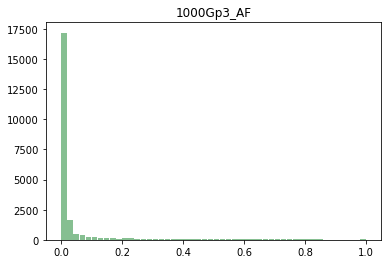

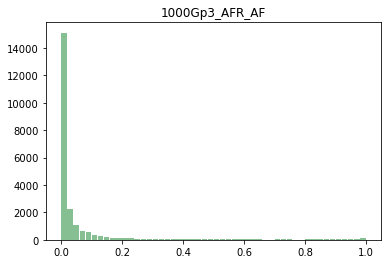

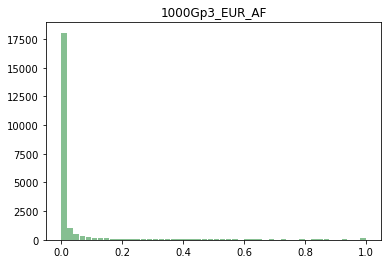

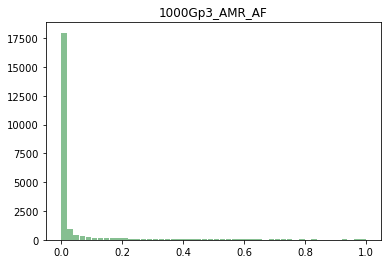

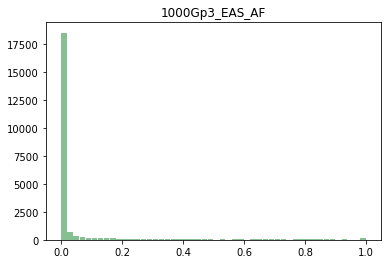

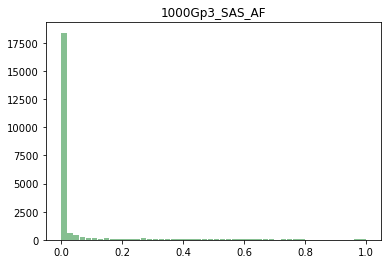

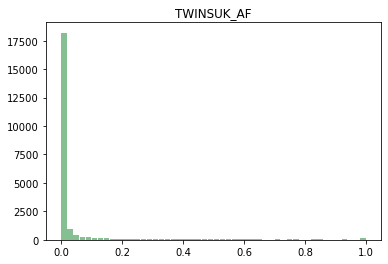

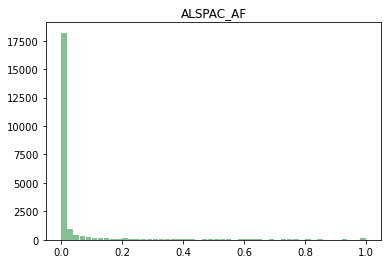

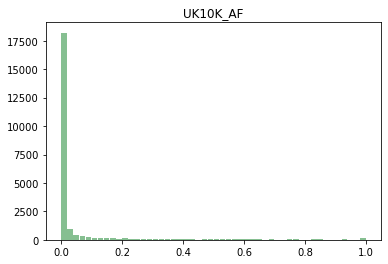

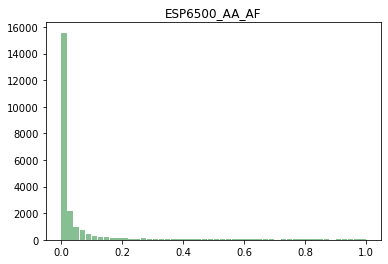

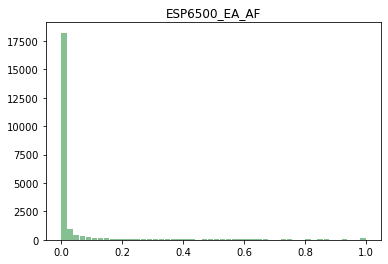

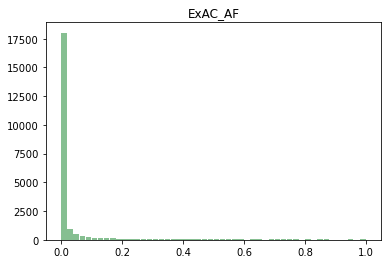

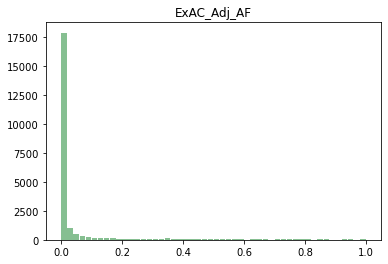

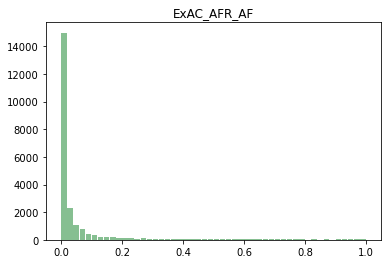

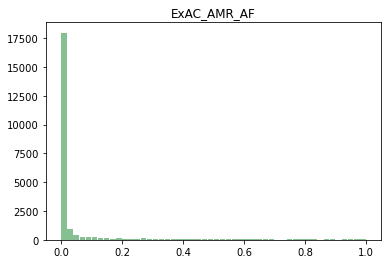

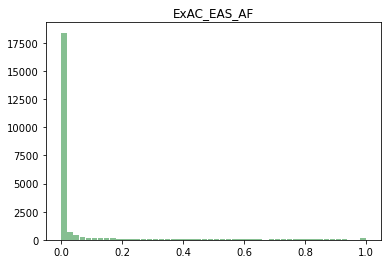

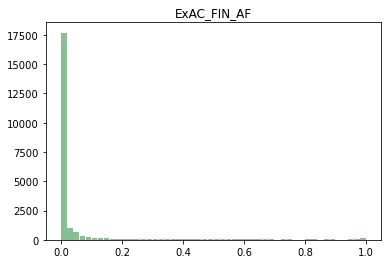

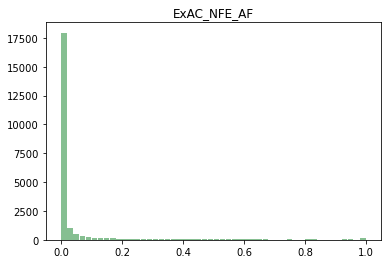

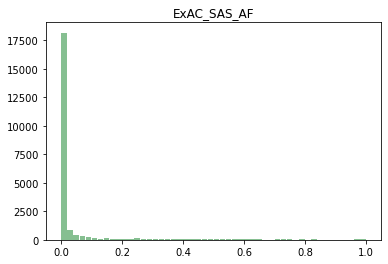

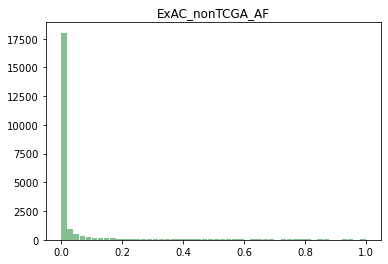

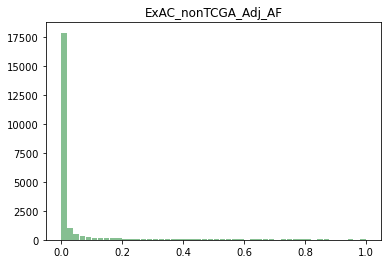

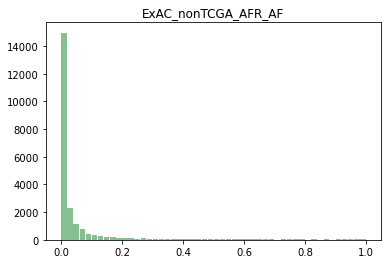

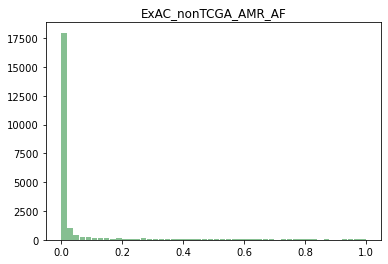

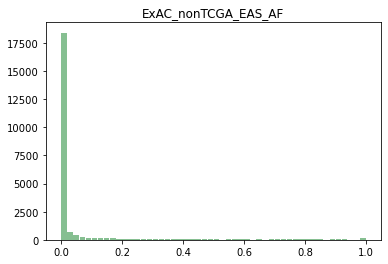

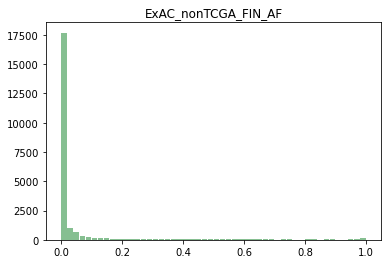

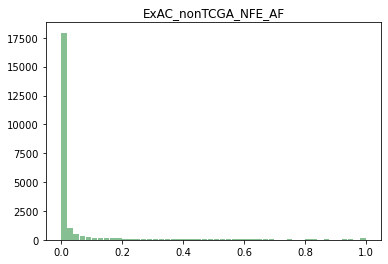

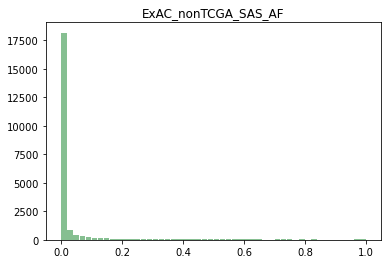

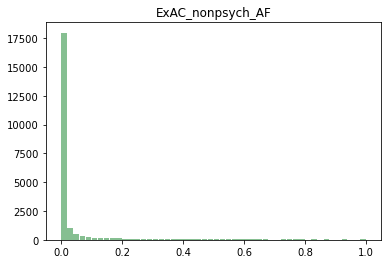

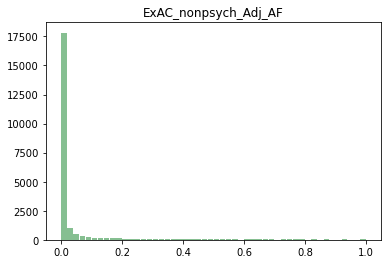

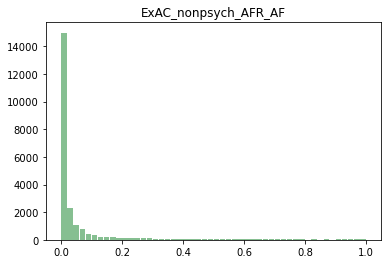

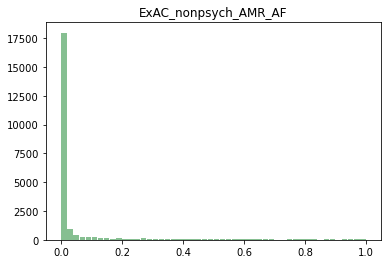

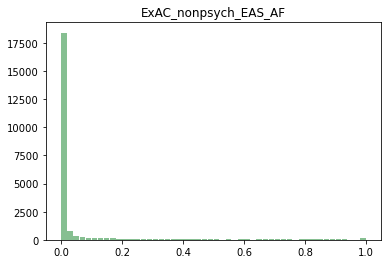

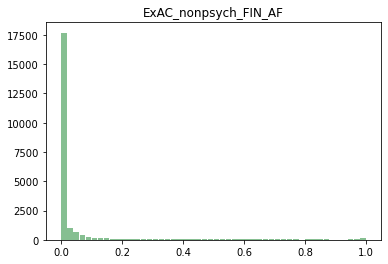

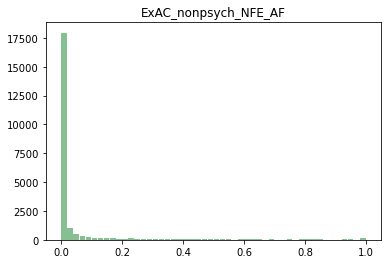

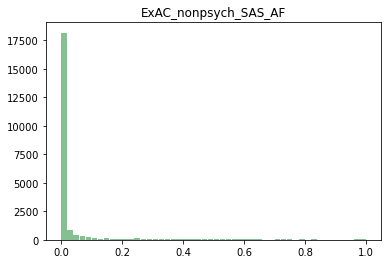

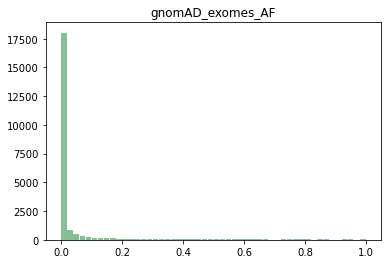

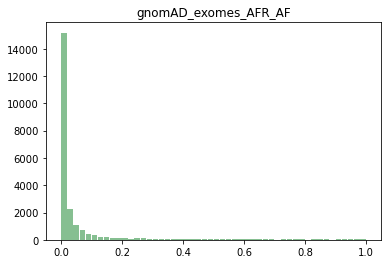

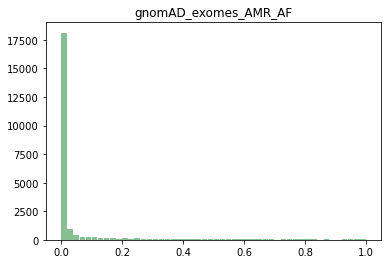

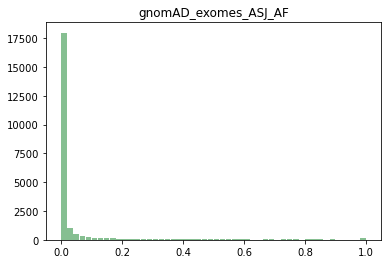

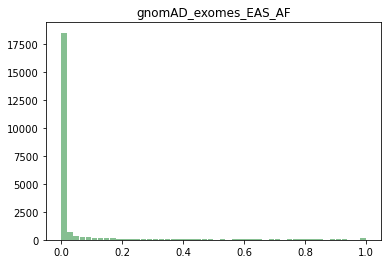

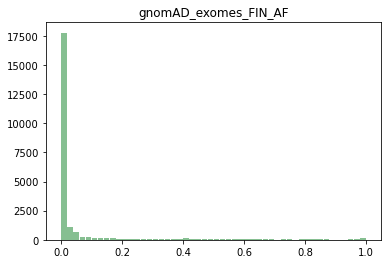

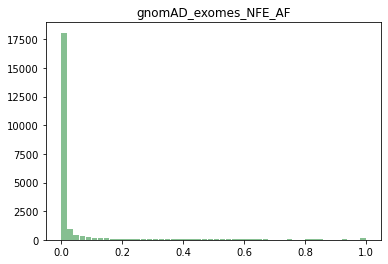

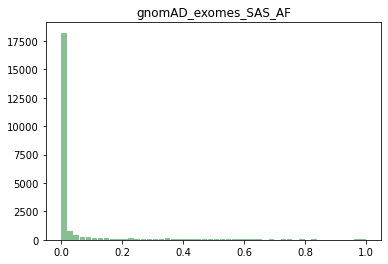

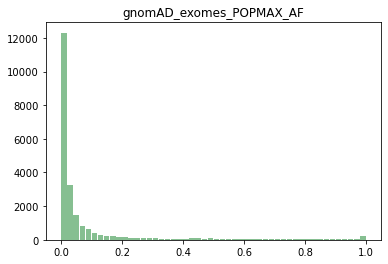

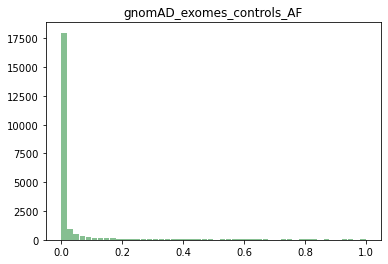

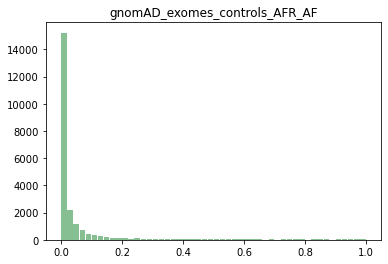

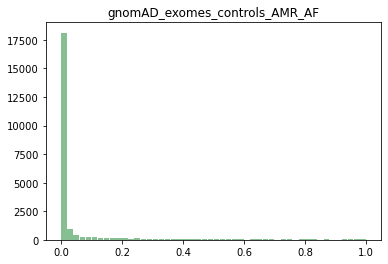

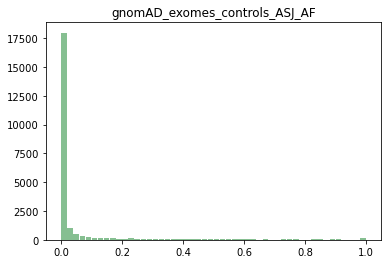

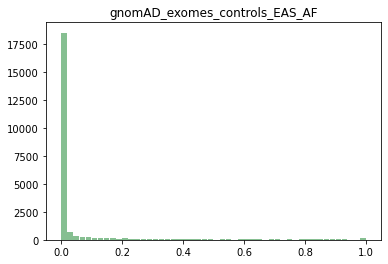

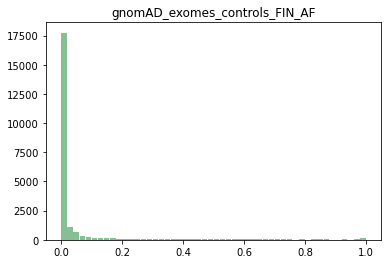

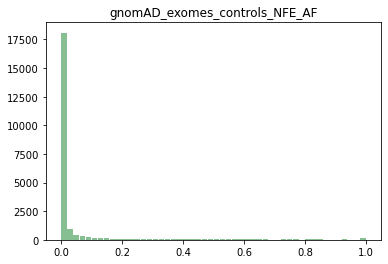

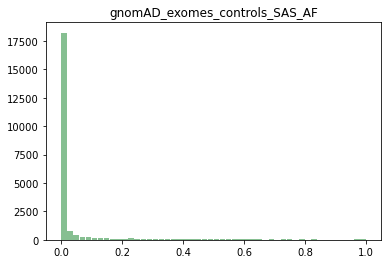

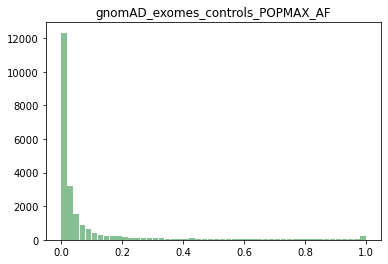

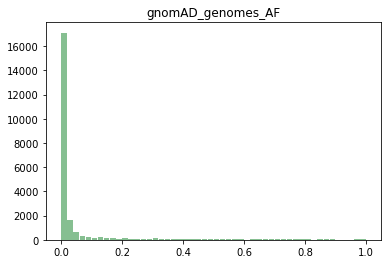

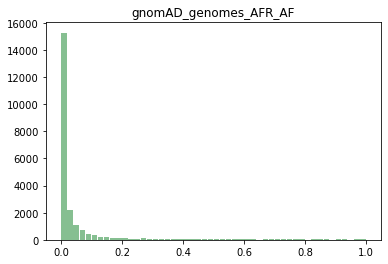

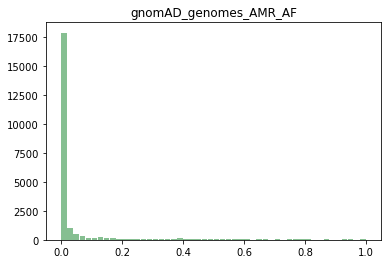

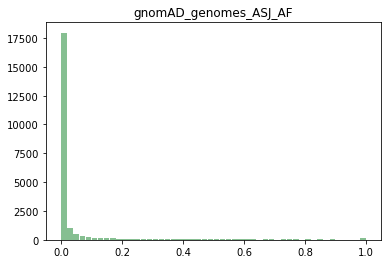

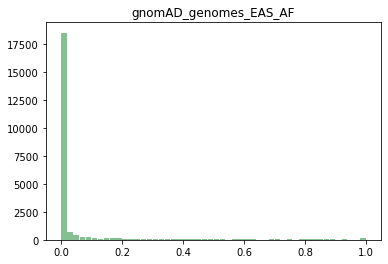

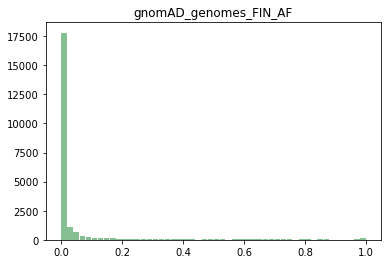

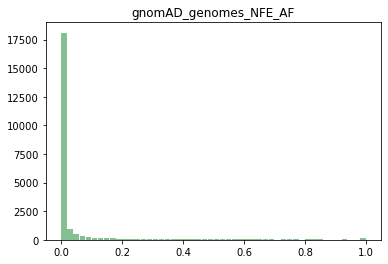

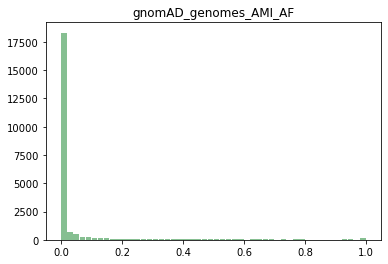

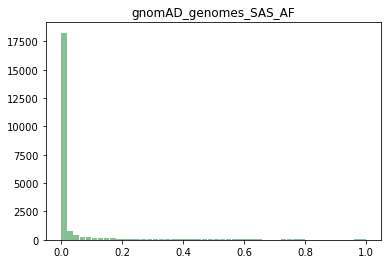

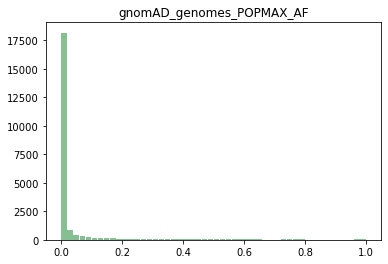

In [22]:
result = [x for x in df1.columns.tolist() if x.endswith('_AF')]
for x in result:
    df1[x] = df1[x].round(3)
    ax = df1.hist(column= x, bins=50, grid=False, sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

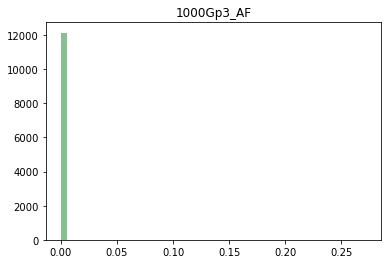

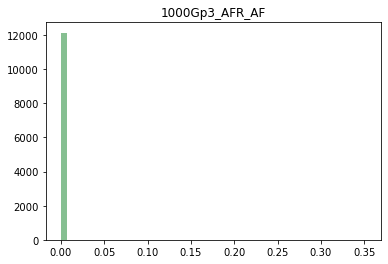

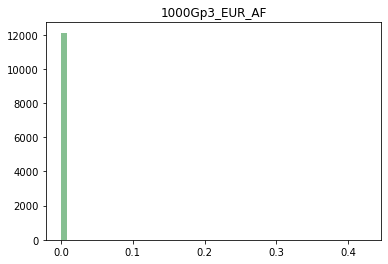

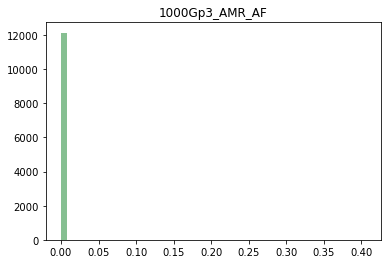

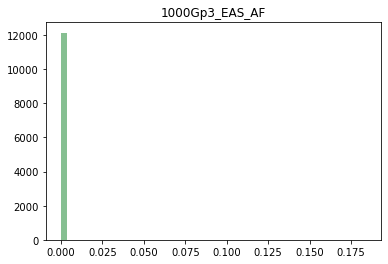

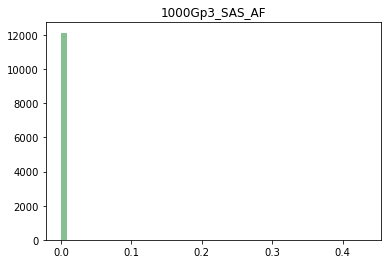

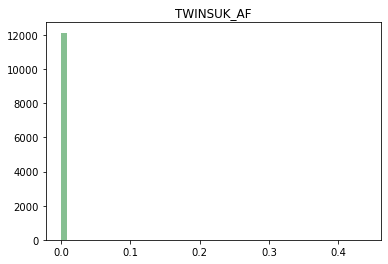

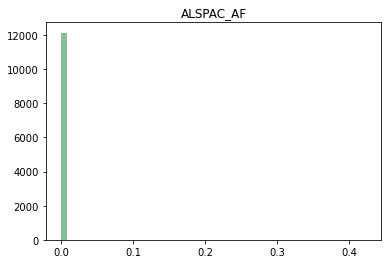

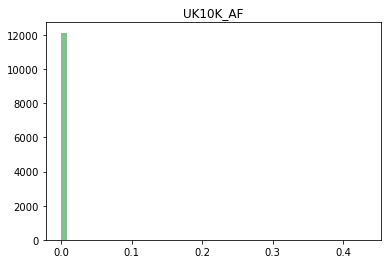

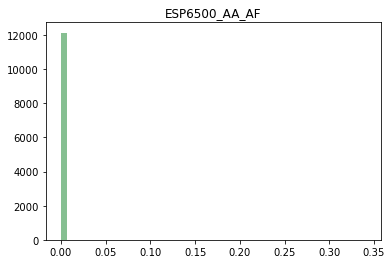

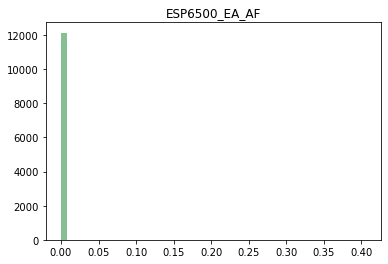

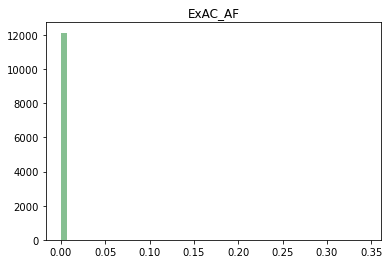

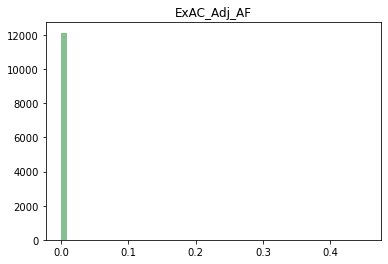

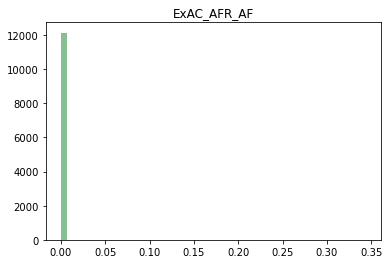

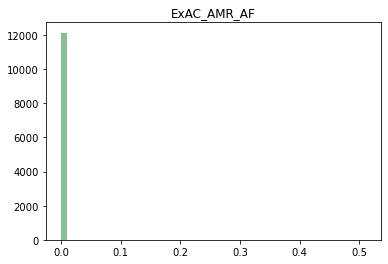

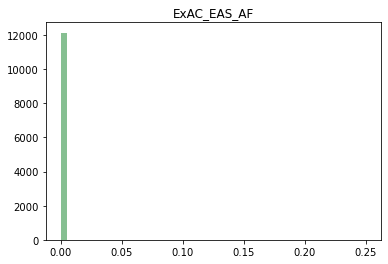

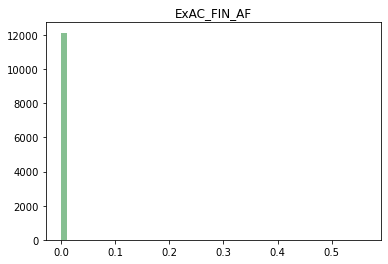

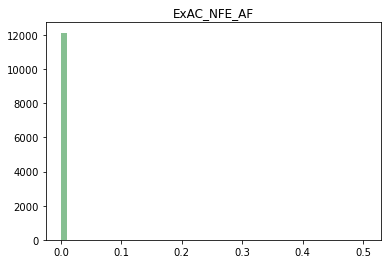

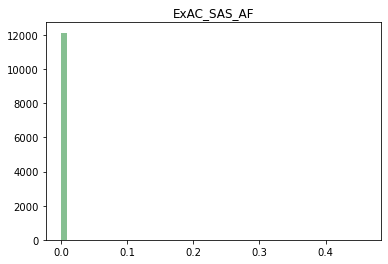

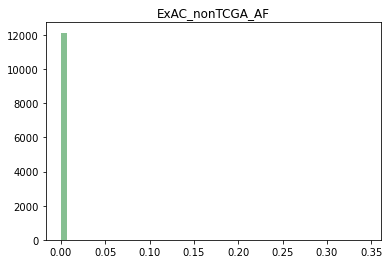

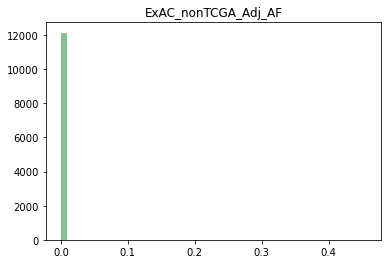

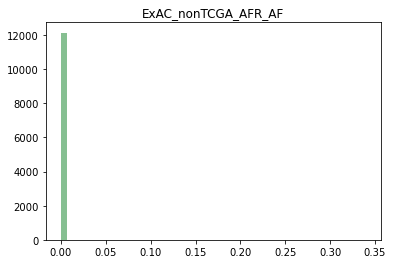

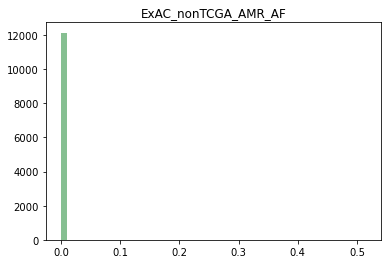

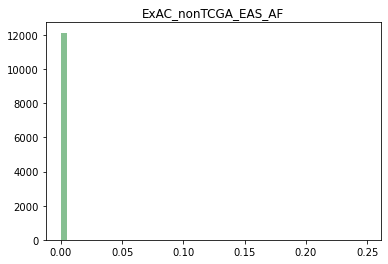

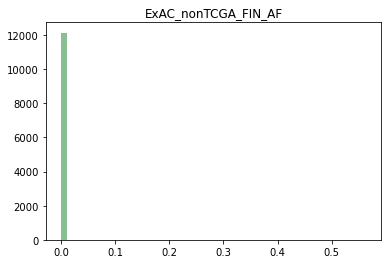

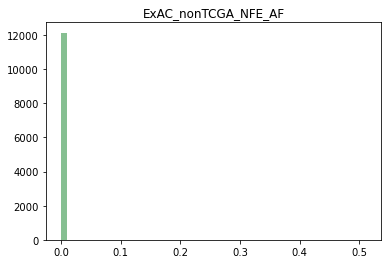

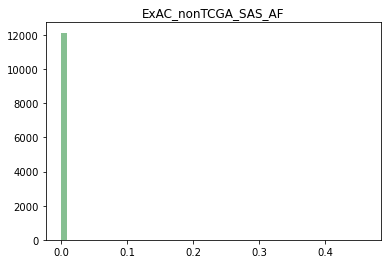

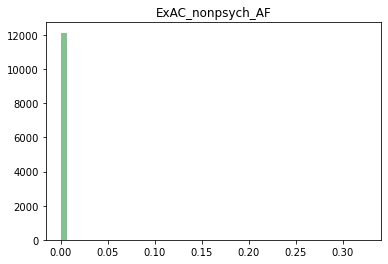

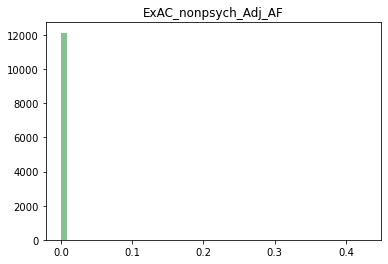

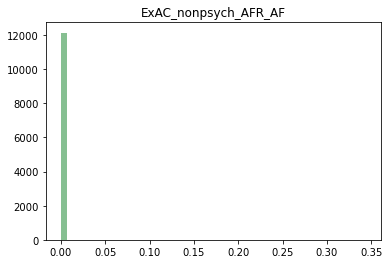

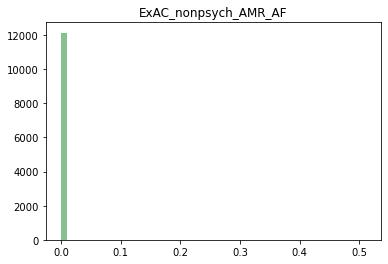

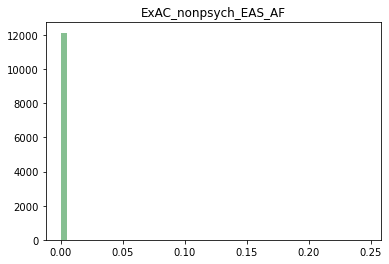

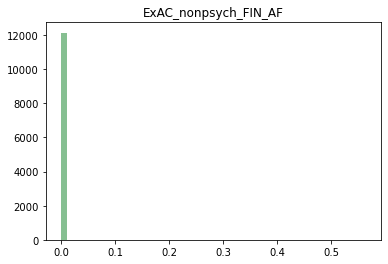

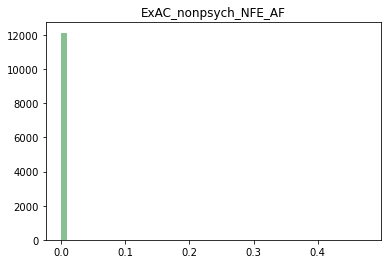

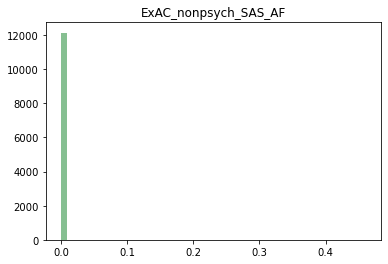

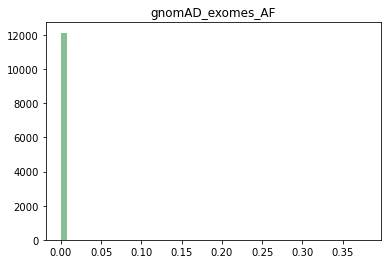

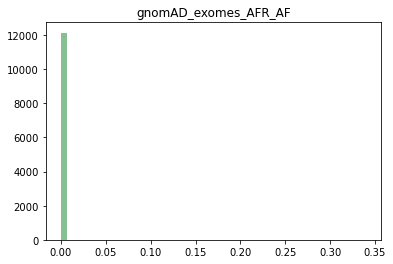

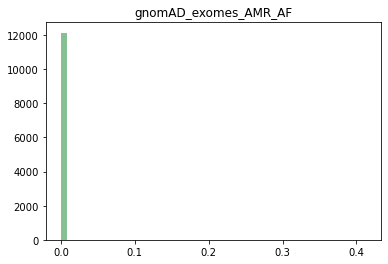

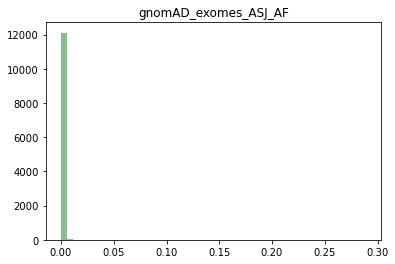

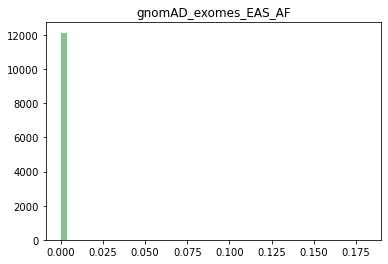

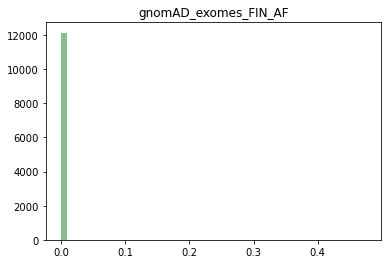

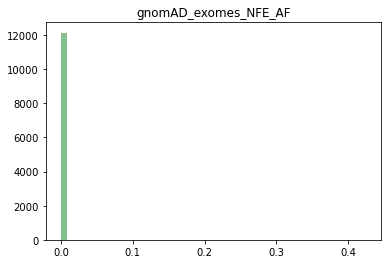

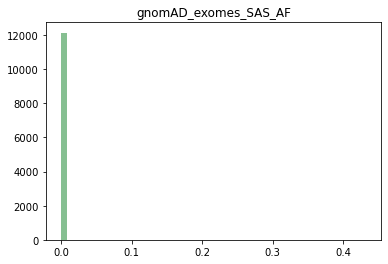

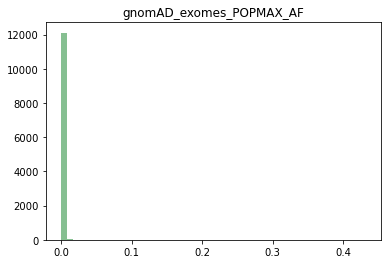

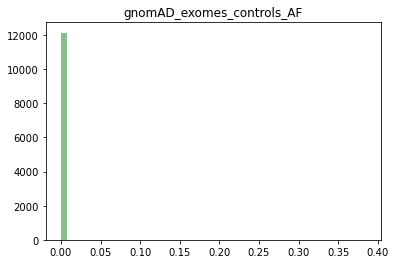

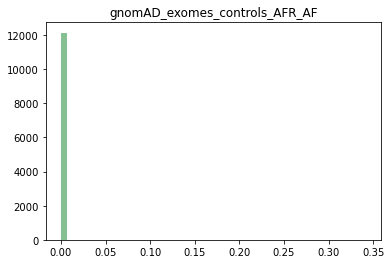

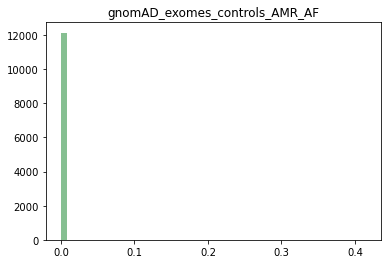

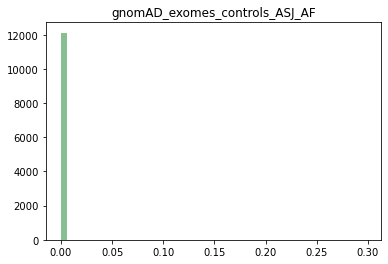

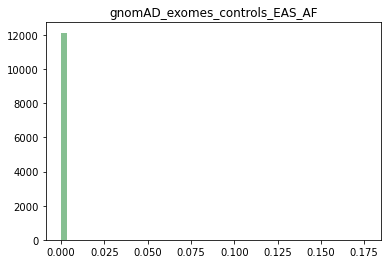

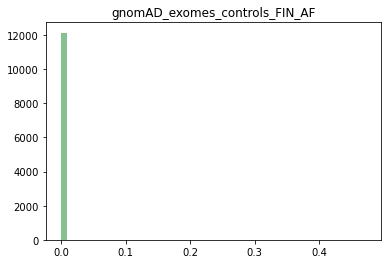

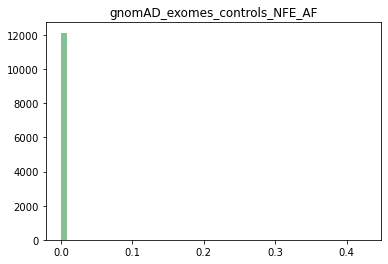

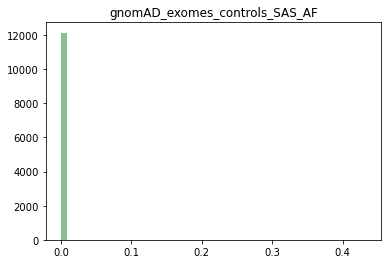

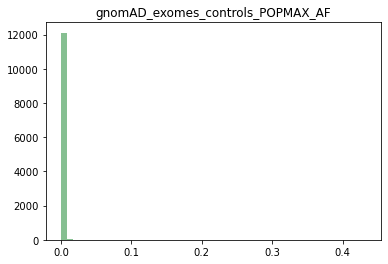

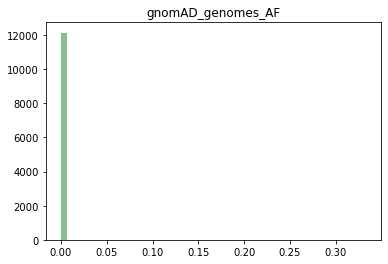

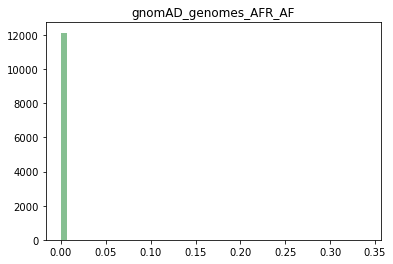

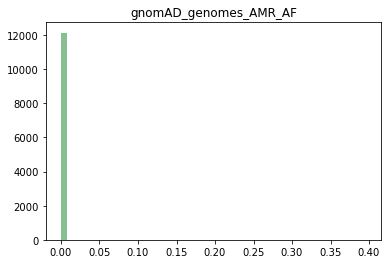

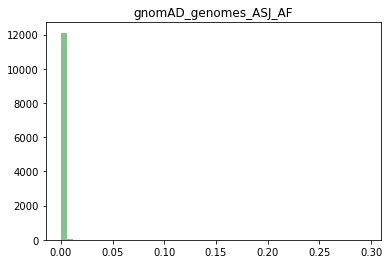

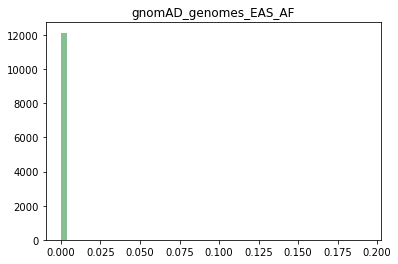

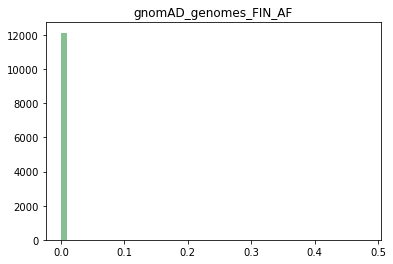

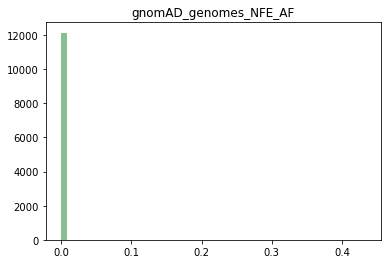

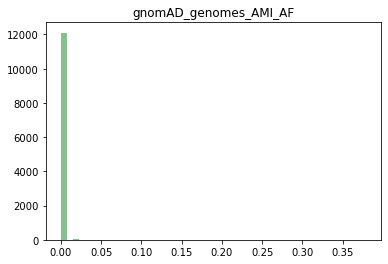

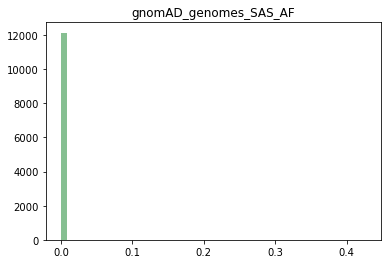

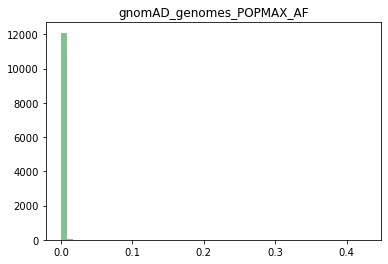

In [23]:
result = [x for x in df2.columns.tolist() if x.endswith('_AF')]
for x in result:
    df2[x] = df2[x].round(3)
    ax = df2.hist(column= x, bins=50, grid=False, sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

La gran mayor parte de los valores de las columnas 'AF' están muy cercanos a 0. 
AF se refiere a Alternative allele frequency, es decir, la frecuencia con la que aparece ese SNP en un determinado grupo étnico.

### Lectura de un diccionario de aminoácidos

In [24]:
import pickle

try:
    file_to_read = open("pickles/aminoacids.pkl", "rb")
    a_dictionary = pickle.load(file_to_read)
except IOError:
    f = open(r"files/aminoacids.txt","r")
    a = f.read().split("\n")
    f.close()
    result = []
    for element in a:
        result.append(element.split("\t"))

    for i in range(0,len(result)):
        result[i][2] = result[i][2].replace("d","").replace(" ","")

    names = [sub[0] for sub in result]
    chars = [sub[2] for sub in result]
    zip_iterator = zip(chars, names)
    a_dictionary = dict(zip_iterator)
    f = open("pickles/aminoacids.pkl","wb")
    pickle.dump(a_dictionary,f)
    f.close()

In [25]:
a_dictionary

{'A': 'Alanine',
 'R': 'Arginine',
 'N': 'Asparagine',
 'D': 'Aspartic acid',
 'C': 'Cysteine',
 'Q': 'Glutamine',
 'E': 'Glutamic acid',
 'G': 'Glycine',
 'H': 'Histidine',
 'I': 'Isoleucine',
 'L': 'Leucine',
 'K': 'Lysine',
 'M': 'Methionine',
 'F': 'Phenylalanine',
 'P': 'Proline',
 'S': 'Serine',
 'T': 'Threonine',
 'W': 'Tryptophan',
 'Y': 'Tyrosine',
 'V': 'Valine'}

## Estudio de la validez de los datos (o su interpretación)

In [26]:
len(df1[df1['#chr'] != df1['hg19_chr']])

0

In [27]:
len(df2[df2['#chr'] != df2['hg19_chr']])

0

Las columnas #chr y hg19_chr son exactamente iguales; vamos a trabajar con la notación hg19, por lo que eliminaremos la primera

In [28]:
df1 = df1.drop(columns=['#chr','pos(1-based)'])
df2 = df2.drop(columns=['#chr','pos(1-based)'])

In [29]:
df1['aapos'].isna().sum() 

2554

In [30]:
df2['aapos'].isna().sum() 

1101

In [31]:
df1.drop_duplicates()
df2.drop_duplicates()

ref alt aaref aaalt hg19_chr  hg19_pos(1-based)  aapos  SIFT_score  \
0       C   T     R     W      1.0            1464679  528.0       0.000   
1       C   T     R     W      1.0            1464679  576.0       0.000   
2       C   T     R     W      1.0            1464679  449.0       0.000   
3       C   T     R     W      1.0            1464679  191.0       0.000   
4       G   A     P     L      1.0            1470752  170.0       0.000   
...    ..  ..   ...   ...      ...                ...    ...         ...   
12162   G   A     R     W        X          154185348    NaN       0.001   
12163   C   T     G     R        X          154189395    NaN       0.000   
12164   C   T     R     H        X          154194800    NaN       0.013   
12165   A   G     F     S        X          154197680    NaN       0.201   
12166   C   T     R     H        X          154197713    NaN       0.108   

       SIFT4G_score  Polyphen2_HDIV_score  Polyphen2_HVAR_score  LRT_score  \
0             0.000                 1.000                 0.994   0.000019   
1             0.000                 1.000                 0.994   0.000019   
2             0.000                 1.000                 0.994   0.000019   
3             0.000                 1.000                 0.994   0.000019   
4             0.000                 0.078                 0.012        NaN   
...             ...                   ...                   ...        ...   
12162         0.002                 1.000                 0.998   0.004926   
12163         0.000                 1.000                 1.000   0.000000   
12164         0.000                 1.000                 0.998   0.001185   
12165         0.049                 1.000                 0.994   0.000002   
12166         0.002                 1.000                 1.000   0.000000   

       LRT_Omega  MutationTaster_score  MutationAssessor_score  FATHMM_score  \
0       0.118979              0.999998                   3.065         -1.82   
1       0.118979              0.999998                   3.065         -1.82   
2       0.118979              0.999998                   3.065         -1.82   
3       0.118979              0.999998                   3.065         -1.82   
4            NaN              0.999999                   0.805           NaN   
...          ...                   ...                     ...           ...   
12162   0.327394              0.975107                   2.585         -5.03   
12163   0.000000              0.998811                   4.260         -9.41   
12164   0.213000              0.999997                   3.070         -5.16   
12165   0.100897              0.651161                   1.510         -5.33   
12166   0.000000              0.979216                   1.845         -6.77   

       PROVEAN_score  VEST4_score  MetaSVM_score  MetaLR_score  M-CAP_score  \
0              -6.96        0.991         0.6138        0.7656     0.349422   
1              -6.96        0.991         0.6138        0.7656     0.349422   
2              -6.96        0.991         0.6138        0.7656     0.349422   
3              -6.96        0.991         0.6138        0.7656     0.349422   
4              -5.76        0.899        -0.9185        0.1145     0.969129   
...              ...          ...            ...           ...          ...   
12162          -5.65        0.774         0.8476        0.9597     0.943181   
12163          -6.83        0.951         0.9529        0.9991     0.987066   
12164          -3.08        0.830         1.0980        0.9691     0.722101   
12165          -3.31        0.833         1.0423        0.9548     0.986264   
12166          -3.54        0.829         1.0247        0.9876     0.905743   

       REVEL_score  MutPred_score  MVP_score  MPC_score  PrimateAI_score  \
0            0.716          0.762   0.930413   1.372550         0.689278   
1            0.716          0.762   0.930413   1.372550         0.689278   
2            0.716

El máximo de valores que toma es 29 en el segundo dataset; es un número bastante elevado para tenerlo de momento en cuenta.

In [33]:
from utils import ds_functions as ds

In [34]:
df1_dup = ds.getDuplicatedCols(df1)
df2_dup = ds.getDuplicatedCols(df2)
print(df1_dup,df2_dup)


[{'ExAC_nonTCGA_FIN_AF', 'ExAC_FIN_AF'}, {'phyloP30way_mammalian_FLAG', 'CADD_raw_hg19_FLAG', 'phyloP17way_primate_FLAG'}] [{'ExAC_nonpsych_AMR_AF', 'ExAC_AMR_AF'}, {'ExAC_nonTCGA_FIN_AF', 'ExAC_FIN_AF'}, {'ExAC_SAS_AF', 'ExAC_nonpsych_SAS_AF'}, {'phyloP30way_mammalian_FLAG', 'CADD_raw_hg19_FLAG', 'phyloP17way_primate_FLAG'}]


En 'Benign' son iguales las columnas:
    
    - grupo 1: 'ExAC_FIN_AF', 'ExAC_nonTCGA_FIN_AF'
    - grupo 2: 'phyloP17way_primate_FLAG', 'phyloP30way_mammalian_FLAG', 'CADD_raw_hg19_FLAG'
    
En 'Patho', son iguales las columnas:

    - grupo 1: 'ExAC_FIN_AF', 'ExAC_nonTCGA_FIN_AF' 
    - grupo 2: 'phyloP17way_primate_FLAG', 'phyloP30way_mammalian_FLAG', 'CADD_raw_hg19_FLAG'
    - grupo 3: 'ExAC_AMR_AF', 'ExAC_nonpsych_AMR_AF'
    - grupo 4: 'ExAC_nonpsych_SAS_AF', 'ExAC_SAS_AF' 
   
   
En ambos datasets se repiten los grupos 1 y 2, por lo que, en caso de hacer uso de ellas en modelos, utilizaremos solo una. 
Hay que tener en cuenta de que las columnas que aparecen repetidas son del tipo Allele Frequency o FLAG, por lo que es bastante normal. 

In [35]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("=====================================================================")
    a = df1.isna().sum().sort_values()[df1.isna().sum().sort_values() > len(df1)/2]
    print(a)
    print("=====================================================================")
    b = df2.isna().sum().sort_values()[df2.isna().sum().sort_values() > len(df2)/2]
    print(b)

M-CAP_score      15892
MutPred_score    21146
dtype: int64
Series([], dtype: int64)


Estas dos columnas tienen también bastantes nulos, por lo que las eliminaremos.

In [39]:
if 'MutPred_score' in df1.columns:
    df1 = df1.drop(columns=['MutPred_score'])
    df2 = df2.drop(columns=['MutPred_score'])
    
if 'M-CAP_score' in df1.columns:
    df1 = df1.drop(columns=['M-CAP_score'])
    df2 = df2.drop(columns=['M-CAP_score'])

In [40]:
from utils import list_functions as lf

result = lf.inCommon(a.index.tolist(), b.index.tolist())
df1 = df1.drop(columns=result)
df2 = df2.drop(columns=result)

## Exportamos los datos

Evitamos que se pierdan pequeños cambios que se hayan podido realizar durante el tratamiento.

In [41]:
df1.to_csv(path_or_buf="datasets/studied_benign.csv")
df2.to_csv(path_or_buf="datasets/studied_patho.csv")